![Stress][def]

[def]: ../data/img/Burnout_min.jpg


---

**Integrantes:** [Luciano🔗](https://www.linkedin.com/in/luciano-weber-76b313a9/) | [Priscila🔗](https://www.linkedin.com/in/priscila-pc/) | [Raphael🔗](https://www.linkedin.com/in/raphapxdevdados/) | [Thais🔗](https://www.linkedin.com/in/thais-telles/) | [Victor🔗](https://www.linkedin.com/in/victorlcastro/)

---

## **Projeto de Machine Learning: Previsão de Dificuldades de Enfrentamento (Coping Struggles) para Seguradora de Saúde** 🌟

Dificuldades de enfrentamento, ou **Coping Struggles**, afetam profundamente a saúde mental e o bem-estar dos segurados. Este projeto visa desenvolver um modelo preditivo para auxiliar uma seguradora de saúde a identificar precocemente indivíduos que possam precisar de suporte emocional, permitindo que intervenções preventivas e personalizadas sejam oferecidas. 💼💡

#### **Objetivo:**

Criar um modelo preditivo que, baseado nas respostas de um questionário, permita à seguradora avaliar o risco de dificuldades de enfrentamento entre seus segurados, facilitando a oferta de programas de apoio à saúde mental. Esse tipo de ação preventiva pode ajudar a reduzir custos futuros e melhorar a qualidade de vida dos segurados. 🙌

#### **Dataset:**

Será utilizado o *[Mental Health Dataset](https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset)* do Kaggle, que contém informações sobre histórico de saúde mental, apoio social, ambiente de trabalho, entre outros fatores relevantes. Esses dados ajudarão a identificar padrões associados a dificuldades de enfrentamento e a treinar o modelo para prever esses desafios com maior precisão. 📊

#### **Como será usada a solução:**

A ferramenta será integrada à plataforma da seguradora, onde os segurados poderão responder perguntas sobre seu bem-estar mental, estratégias de enfrentamento e outros fatores de risco. Com base nessas respostas, o modelo fornecerá uma análise do risco de dificuldades de enfrentamento, possibilitando que a seguradora ofereça programas de apoio, aconselhamento e recursos de saúde mental específicos para cada necessidade. 🧠🔍

#### **Benefícios para a Seguradora:**

- **Prevenção e Redução de Custos**: Ao identificar clientes em risco, a seguradora pode intervir preventivamente, o que pode reduzir a necessidade de tratamentos caros e melhorar o bem-estar dos segurados.
- **Customização de Planos de Saúde Mental**: Com uma compreensão mais detalhada dos riscos, a seguradora pode oferecer pacotes de saúde mental personalizados, agregando valor aos serviços e aumentando a satisfação do cliente.
- **Dados para Programas de Saúde Preventiva**: O modelo permitirá à seguradora detectar padrões e prever demandas futuras para programas de bem-estar e saúde mental, melhorando a gestão de recursos.

#### **Desempenho do modelo:**

O modelo será avaliado com base na precisão, recall e F1-score, com ênfase em um alto recall para minimizar os casos de dificuldade de enfrentamento que passam despercebidos. A meta será atingir pelo menos 80% de recall e 75% de precisão. 📈✅

#### **Problemas comparáveis e reutilização de ferramentas:**

Modelos usados para previsão de saúde mental em empresas e programas de bem-estar fornecem uma base importante. Ferramentas de classificação binária e análise de dados psicossociais serão úteis para criar uma solução robusta e confiável. 🔄

#### **Coleta e Preparação dos Dados:**

O dataset será tratado para incluir fatores de enfrentamento, como apoio social, estresse no trabalho e histórico de saúde mental. Será realizada uma adequação dos dados para garantir que os insights produzidos atendam às exigências de proteção e privacidade, em conformidade com a LGPD e outras regulamentações. 📂🔒

#### **Conclusão:**

Com esse projeto, a seguradora poderá identificar segurados em risco de dificuldades emocionais e fornecer suporte antecipado, contribuindo para um serviço de saúde mental mais preventivo e humanizado. Essa iniciativa poderá não só melhorar a qualidade de vida dos clientes, mas também agregar valor aos serviços da seguradora, diferenciando-a no mercado. 🌱💼

---


# **1. Importação das bibliotecas**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.express as px
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
import joblib

#### **2. Carregamento dos dados**

In [2]:
# Carregar o dataset
df = pd.read_csv("../data/Mental Health Dataset.csv")

#### **3. Estudo de cada atributo e suas características**

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

O DataFrame contém 292364 entradas e 17 colunas, todas do tipo object. A maioria das colunas não possui valores nulos, exceto self_employed, que tem 287162 valores não nulos. O uso de memória do DataFrame é de aproximadamente 37.9 MB. As colunas incluem informações sobre gênero, país, ocupação, histórico familiar, tratamento, dias dentro de casa, estresse crescente, mudanças de hábitos, histórico de saúde mental, oscilações de humor, dificuldades de enfrentamento, interesse no trabalho, fraqueza social, entrevistas de saúde mental e opções de cuidado.

In [5]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


A análise dos dados revela que a maioria dos respondentes são homens dos Estados Unidos, com a ocupação mais comum sendo dona de casa. A maioria não é autônoma e não possui histórico familiar de problemas de saúde mental, embora muitos tenham recebido tratamento. A maioria passou de 1 a 14 dias em ambientes fechados e relatou mudanças nos hábitos e níveis médios de oscilações de humor. Muitos não têm dificuldades de enfrentamento, não estão interessados no trabalho e têm incertezas sobre suas opções de cuidados. Esses insights podem orientar intervenções e programas de apoio à saúde mental.

In [6]:
df.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

#### **4. Identificar os Potenciais Atributos para Prever Dificuldades de Enfrentamento**

Para identificar os potenciais atributos para prever dificuldades de enfrentamento (Coping Struggles), é essencial analisar os dados disponíveis no dataset e entender como cada atributo pode influenciar o comportamento e a saúde mental dos indivíduos. Com base no contexto do dataset, que inclui informações sobre histórico de saúde mental, apoio social, ambiente de trabalho, entre outros fatores, podemos destacar os seguintes atributos como potenciais preditores:

- **Histórico de Saúde Mental (Mental_Health_History)**:
    - Indivíduos com histórico de problemas de saúde mental podem ter maior probabilidade de enfrentar dificuldades de enfrentamento. Este atributo pode fornecer insights sobre a vulnerabilidade do indivíduo a problemas emocionais.

- **Estresse Crescente (Growing_Stress)**:
    - O nível de estresse crescente pode ser um indicador direto de dificuldades de enfrentamento. Indivíduos que relatam aumento no estresse podem estar mais propensos a enfrentar desafios emocionais.

- **Mudanças de Hábitos (Changes_Habits)**:
    - Mudanças significativas nos hábitos, como alterações no sono, alimentação ou atividades diárias, podem ser sinais de dificuldades de enfrentamento. Este atributo pode ajudar a identificar mudanças comportamentais que precedem problemas emocionais.

- **Dias Dentro de Casa (Days_Indoors)**:
    - O tempo que um indivíduo passa dentro de casa pode refletir seu nível de isolamento social e bem-estar emocional. Indivíduos que passam mais tempo dentro de casa podem estar enfrentando dificuldades de enfrentamento.

- **Gênero (Gender)**:
    - O gênero pode influenciar a forma como os indivíduos lidam com o estresse e as dificuldades emocionais. Diferentes gêneros podem ter diferentes níveis de vulnerabilidade a problemas de enfrentamento.

- **Histórico Familiar (family_history)**:
    - Um histórico familiar de problemas de saúde mental pode aumentar a probabilidade de um indivíduo enfrentar dificuldades de enfrentamento. Este atributo pode fornecer informações sobre predisposições genéticas e ambientais.

- **Ocupação (Occupation)**:
    - O tipo de ocupação pode influenciar o nível de estresse e a capacidade de enfrentamento dos indivíduos. Certas ocupações podem ser mais estressantes e exigir mais habilidades de enfrentamento.

- **Autoemprego (self_employed)**:
    - Indivíduos autônomos podem enfrentar diferentes tipos de estresse e desafios em comparação com aqueles que trabalham para empregadores. Este atributo pode ajudar a identificar diferenças nas dificuldades de enfrentamento entre esses grupos.

- **Entrevista de Saúde Mental (mental_health_interview)**:
    - A disposição de um indivíduo para participar de entrevistas de saúde mental pode indicar sua abertura para discutir e enfrentar problemas emocionais. Este atributo pode ser um indicador de conscientização e proatividade em relação à saúde mental.

- **Opções de Cuidado (care_options)**:
    - A disponibilidade e o acesso a opções de cuidado de saúde mental podem influenciar a capacidade de enfrentamento dos indivíduos. Este atributo pode ajudar a identificar a relação entre suporte disponível e dificuldades de enfrentamento.

Esses atributos, quando analisados em conjunto, podem fornecer uma visão abrangente dos fatores que contribuem para as dificuldades de enfrentamento dos indivíduos. A análise desses atributos pode ajudar a construir um modelo preditivo robusto para identificar aqueles que podem precisar de suporte emocional e intervenções preventivas, dessa maneira, serão testados e avaliados para determinar sua relevância e impacto na previsão de dificuldades de enfrentamento.

#### **5. Visualização dos dados**

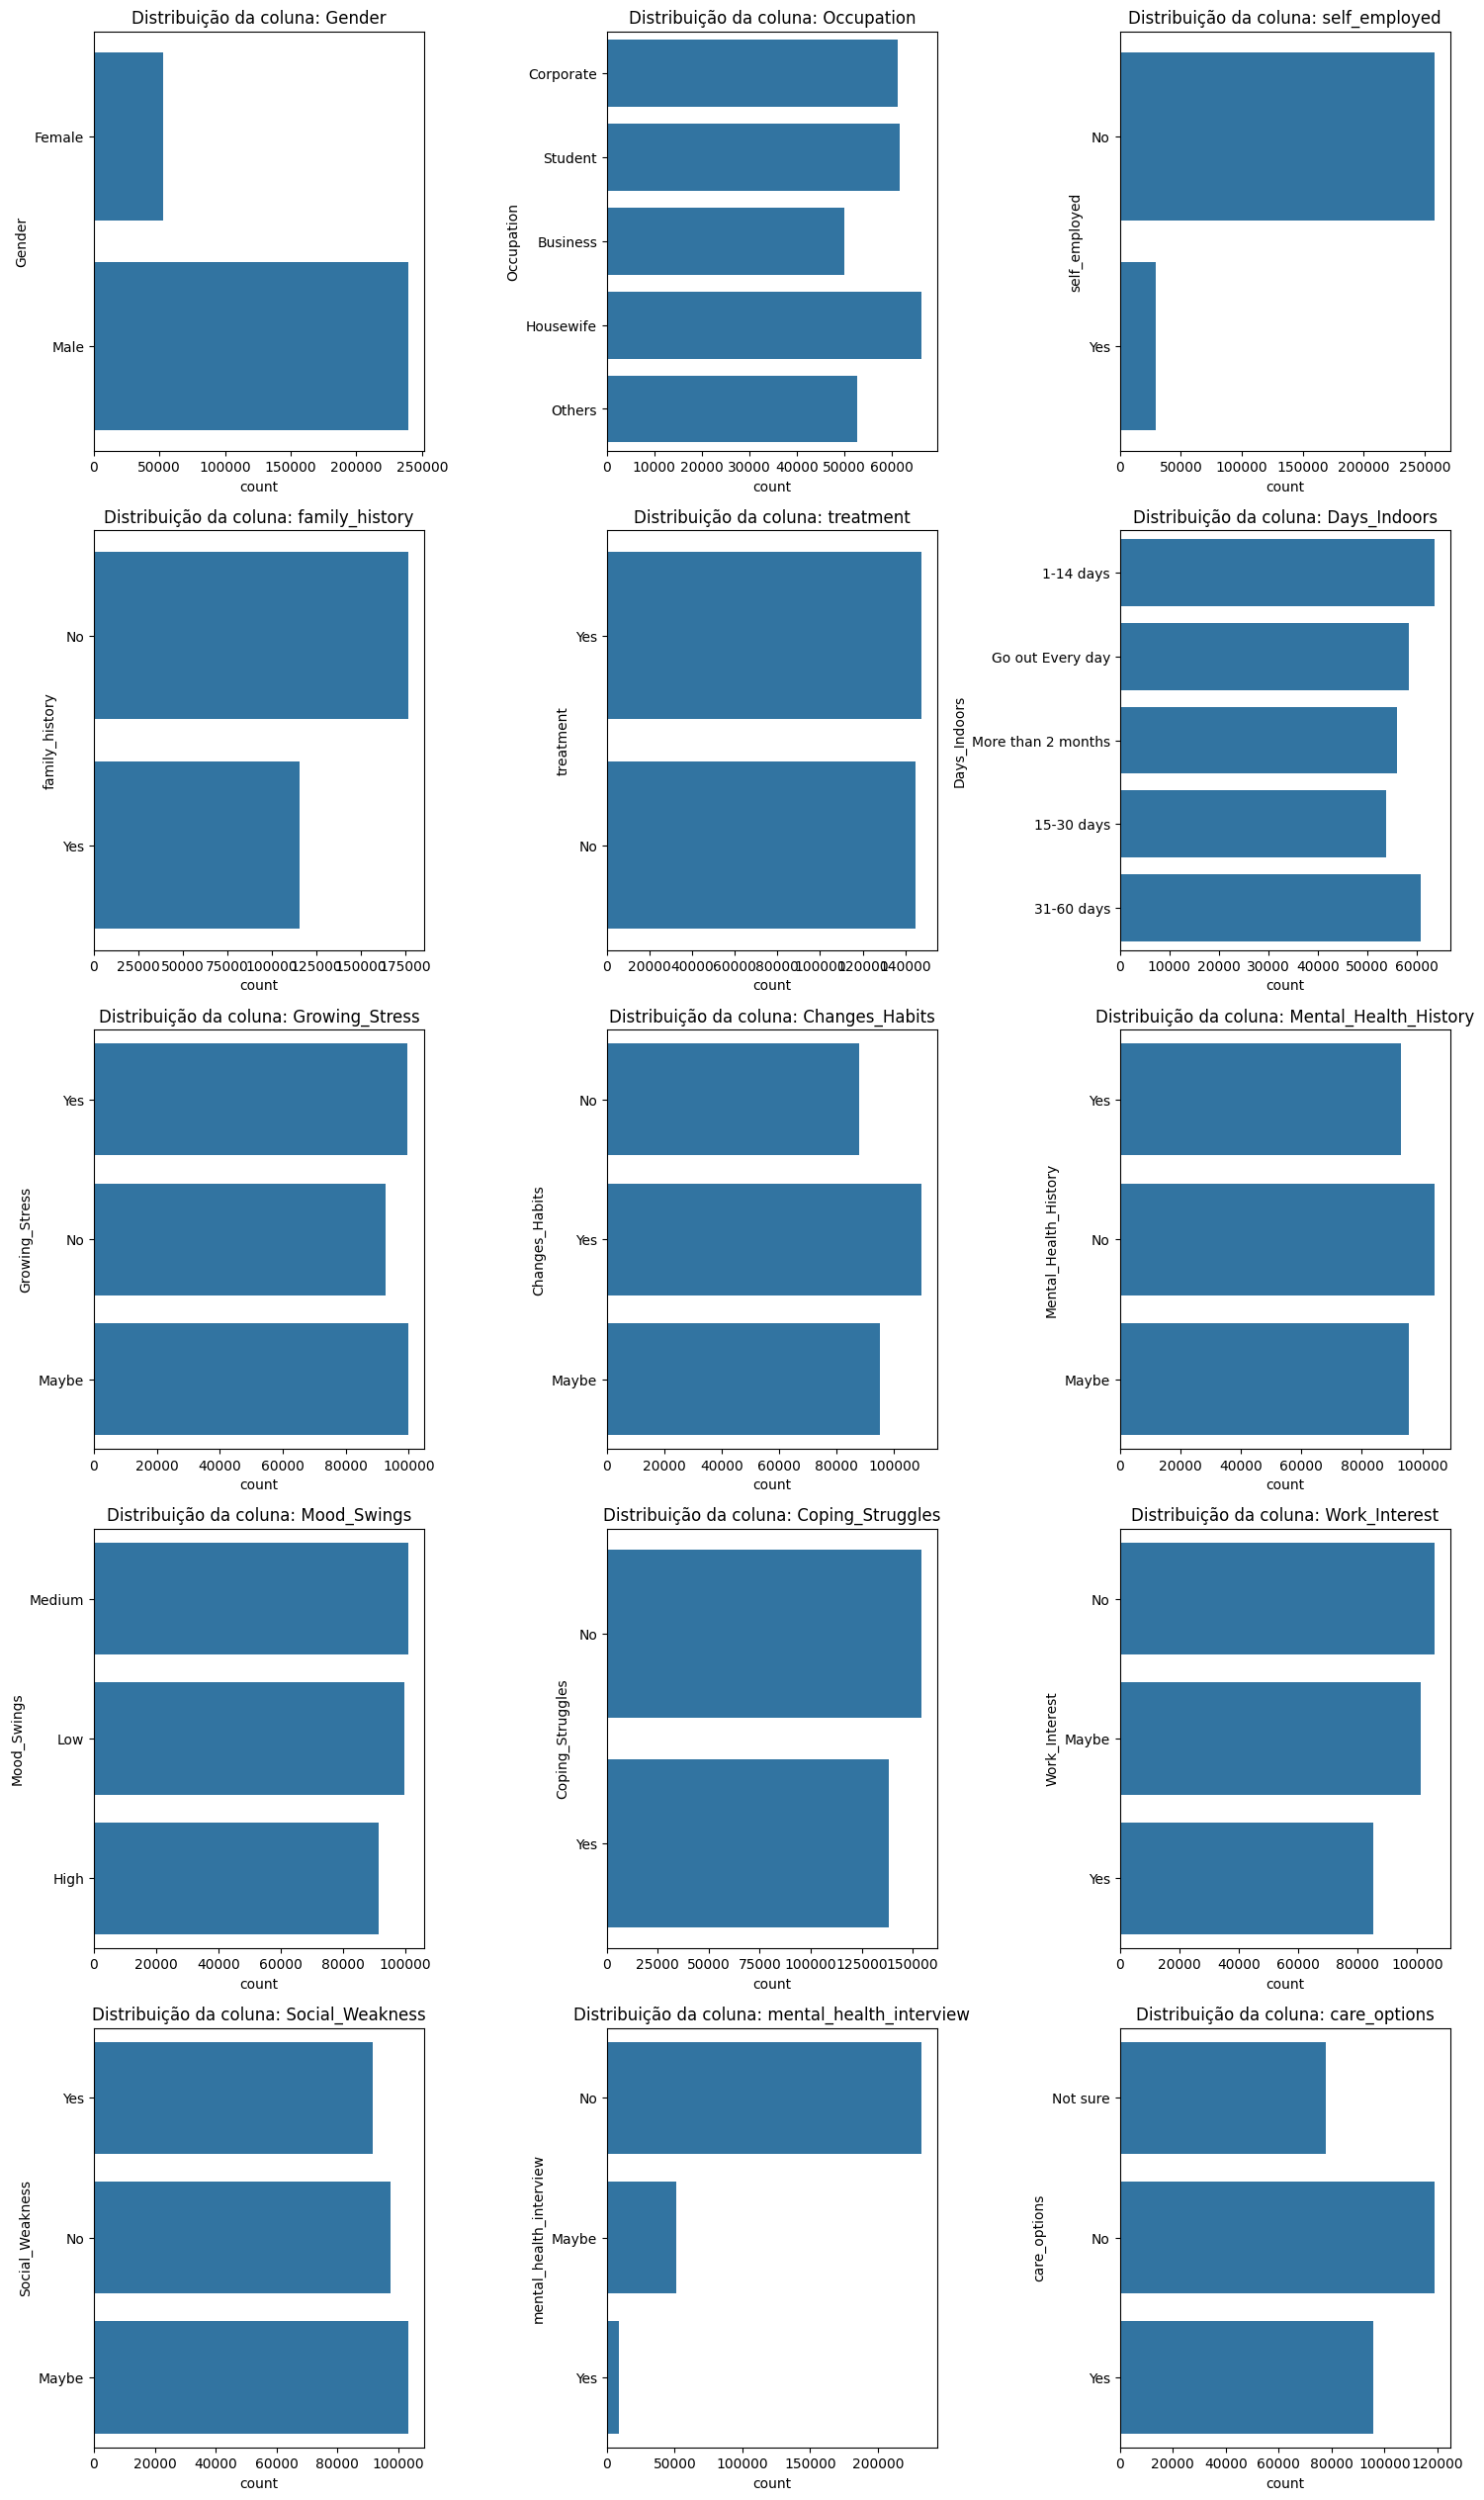

In [7]:
# Remover a coluna Timestamp e Country
df_eda = df.drop(['Timestamp', 'Country'], axis=1, inplace=False)

# Supondo que seu DataFrame se chama df
num_cols = len(df_eda.columns)
num_rows = (num_cols // 3) + 1

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, column in enumerate(df_eda.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.countplot(y=column, data=df_eda, ax=ax)
    ax.set_title(f'Distribuição da coluna: {column}')

# Remover subplots vazios
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

A imagem apresenta a distribuição de diversas variáveis relacionadas a questões de saúde mental e bem-estar. A partir dos gráficos, podemos observar que a maioria das pessoas não apresenta histórico familiar de condições mentais, mas um número significativo de indivíduos enfrenta estresse crescente, alterações nos hábitos e dificuldades de lidar com a situação. Além disso, a prevalência de mudanças de humor é alta, e muitas pessoas indicam ter dificuldades em lidar com o estresse e em se manter motivadas no trabalho. Também é notável que uma grande parte da população do conjunto de dados passa até 14 dias seguidos em casa, sugerindo possível impacto na rotina e no comportamento social. A busca por tratamento é mais comum entre os participantes, enquanto o interesse por opções de cuidados parece ser uma preocupação relevante. A falta de entrevistas sobre saúde mental e a distribuição equilibrada de respostas sobre fraqueza social indicam uma variabilidade nas experiências e no engajamento com o apoio à saúde mental.

In [8]:
# Contar a quantidade de dados para cada país
country_counts = df['Country'].value_counts().reset_index()

# Renomear as colunas
country_counts.columns = ['Country', 'Count']

# Crie o gráfico de mapa
fig = px.choropleth(
    country_counts,
    locations="Country",  # Coluna com os nomes dos países
    locationmode="country names",  # Indica que usaremos o nome dos países
    color="Count",  # Coluna com a contagem de dados
    color_continuous_scale="Viridis",  # Escala de cor
    title="Contagem de Dados por País"
)

# Ajuste o tamanho do mapa
fig.update_layout(
    width=1200,  # Largura do gráfico
    height=800   # Altura do gráfico
)

# Exiba o gráfico
fig.show()

A análise do conjunto de dados revela que a maioria das respostas provém dos Estados Unidos, com um total de 171.308 entradas, representando uma parcela significativa do total de 292.364 registros. Essa predominância pode influenciar os resultados do modelo preditivo, uma vez que as características e padrões de comportamento dos respondentes dos Estados Unidos podem não ser representativos de outras regiões. Portanto, é crucial considerar essa distribuição ao interpretar os resultados e ao aplicar o modelo em contextos internacionais, garantindo que as intervenções e programas de apoio à saúde mental sejam adequados e eficazes para diferentes populações.

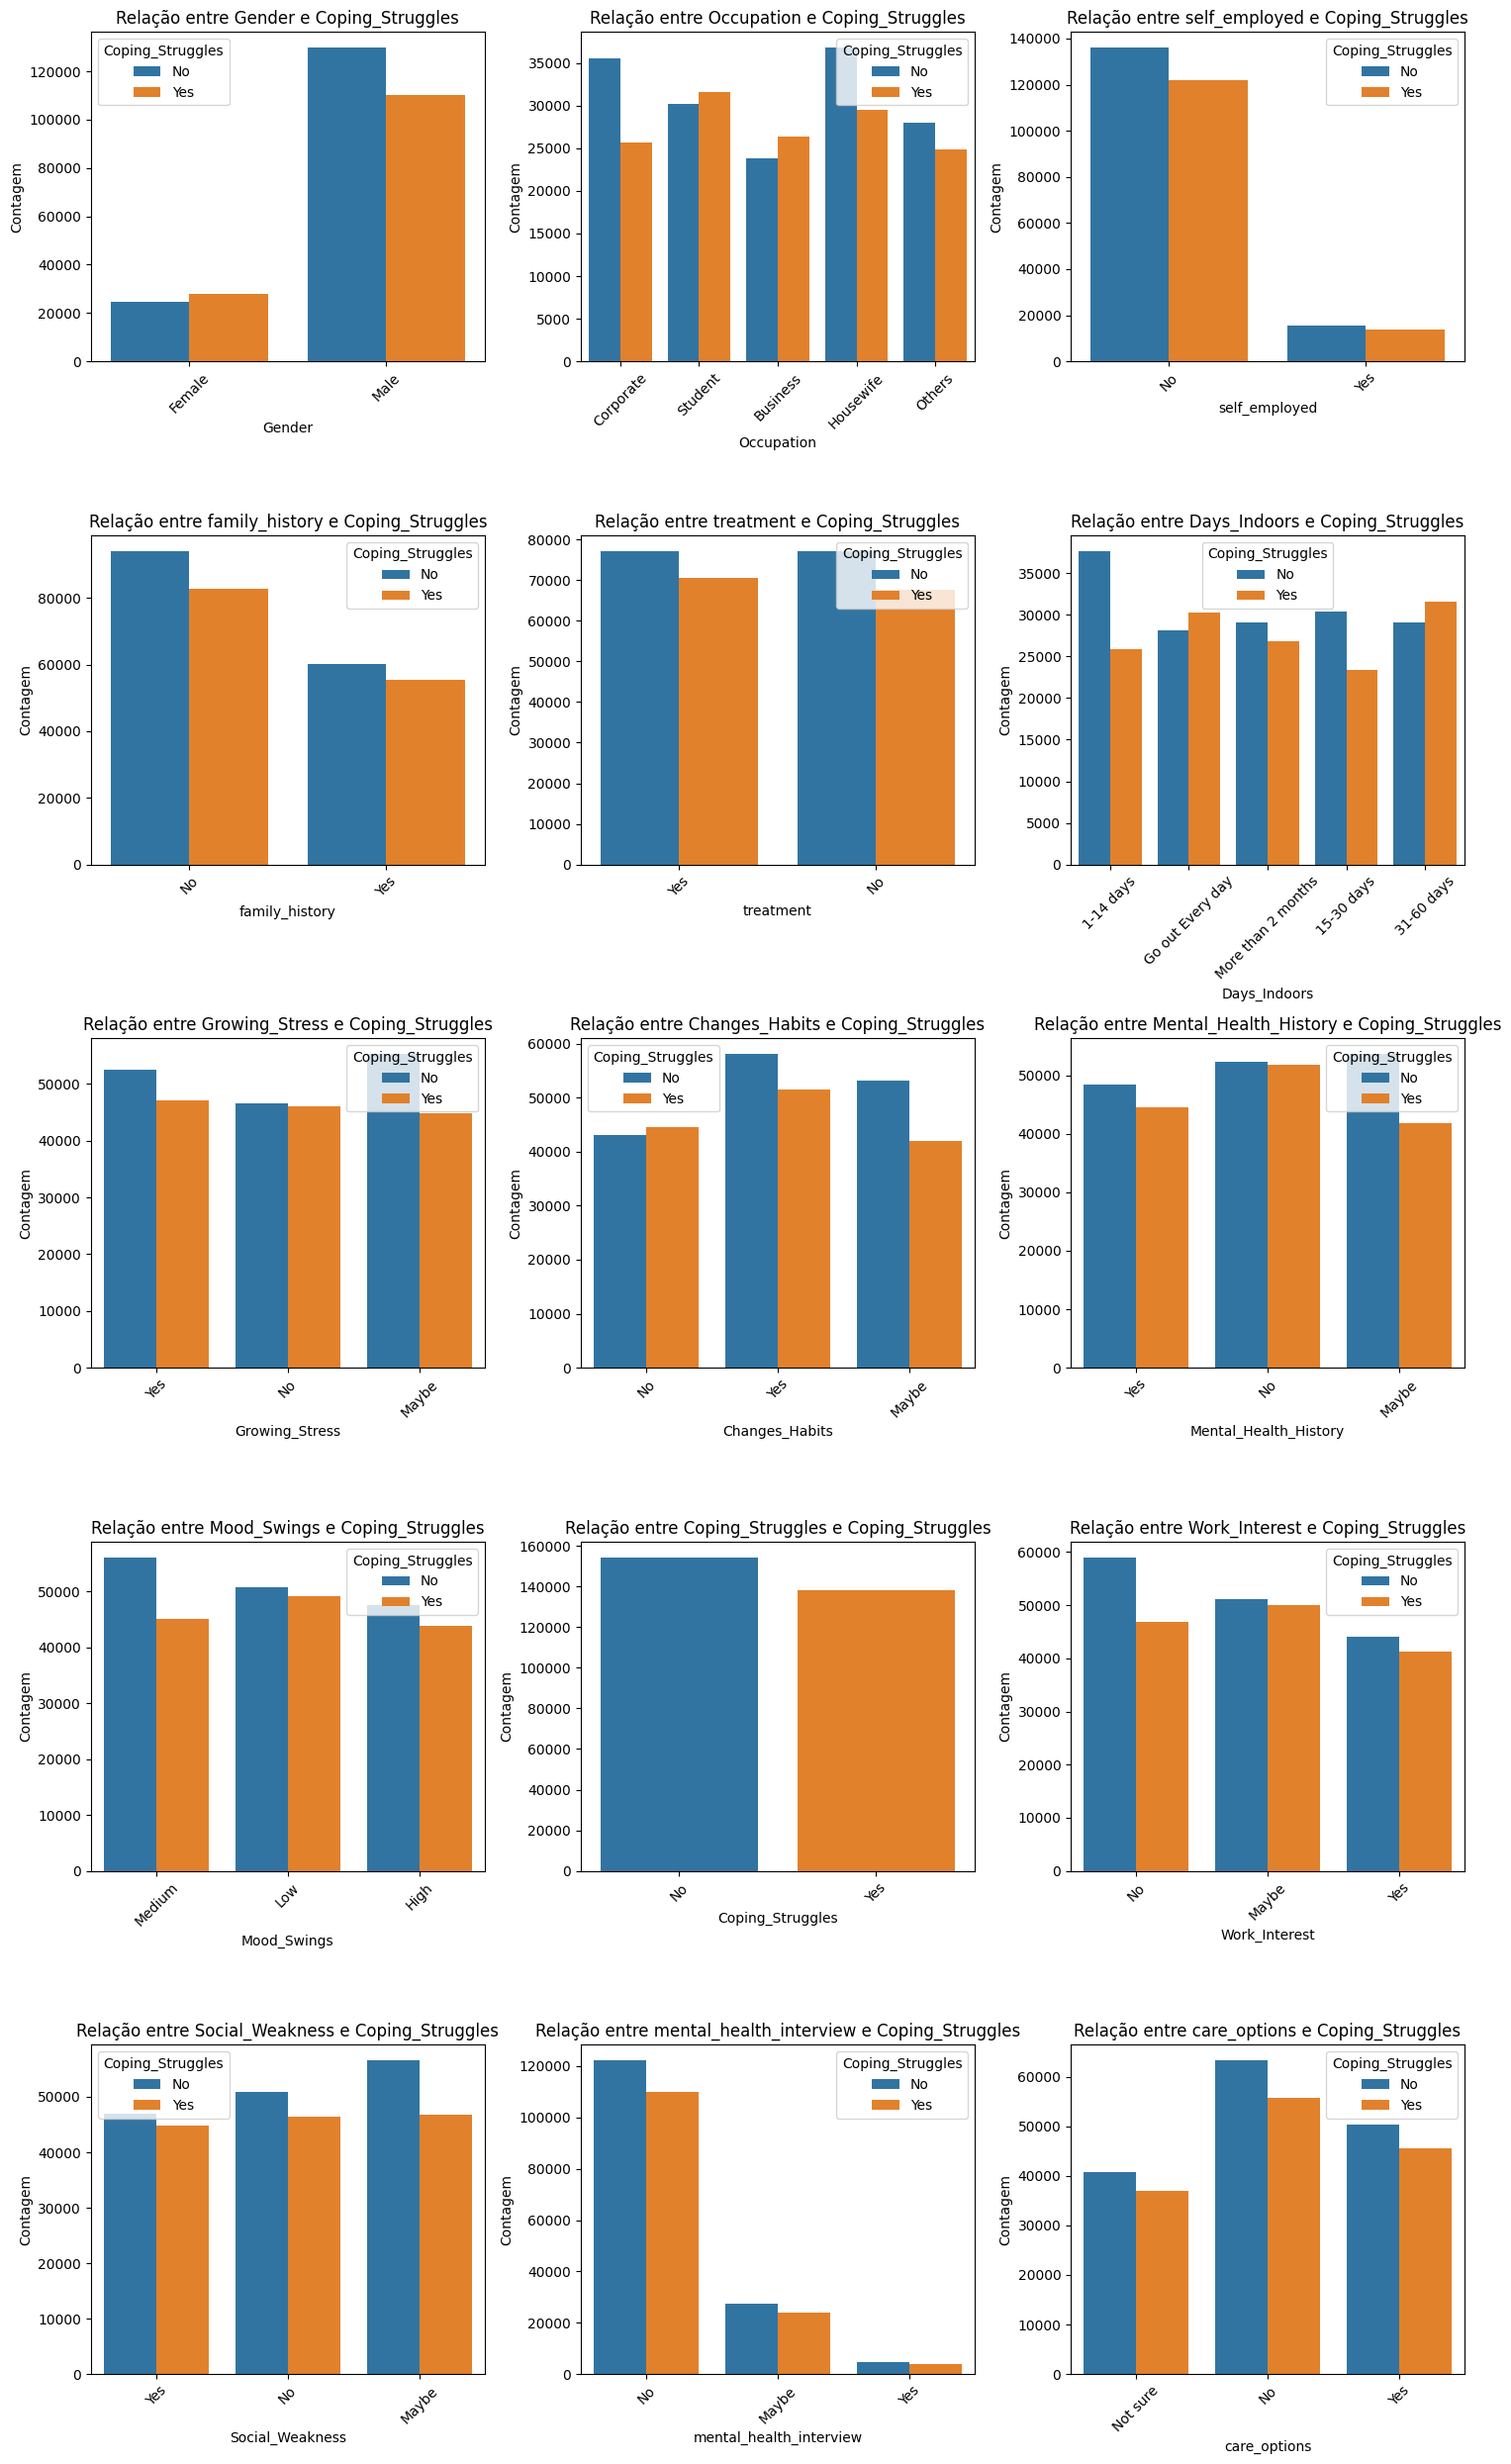

In [91]:
# Selecionar colunas categóricas, excluindo a coluna 'Country'
categorical_cols = df_eda.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'Country']

# Definir o número de linhas e colunas para os subplots
n_cols = 3
n_rows = (len(categorical_cols) + 1) // n_cols

# Criar subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Plotar cada variável categórica
for i, col in enumerate(categorical_cols):
    ax = sns.countplot(data=df_eda, x=col, hue='Coping_Struggles', ax=axes[i])
    axes[i].set_title(f'Relação entre {col} e Coping_Struggles')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Contagem')
    if ax.get_legend() is not None:
        axes[i].legend(title='Coping_Struggles')
    axes[i].tick_params(axis='x', rotation=45)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Análises das Variáveis e Coping_Struggles**

**Gênero:**

- **Feminino (Female):** Maior proporção de dificuldades de enfrentamento.
- **Masculino (Male):** Maior proporção de indivíduos sem dificuldades de enfrentamento.

**Ocupação:**

- **Housewife (Dona de Casa):** Maior contagem de dificuldades de enfrentamento.
- **Corporate (Corporativo) e Student (Estudante):** Também têm alta contagem de dificuldades.

**Trabalho Autônomo:**

- **Não Autônomos (No):** Maior contagem de dificuldades de enfrentamento.
- **Autônomos (Yes):** Menor proporção de dificuldades de enfrentamento.

**Mudanças de Humor (Mood Swings):**

- **Médias (Medium) e Altas (High):** Mais associadas a dificuldades de enfrentamento.
- **Baixas (Low):** Maior proporção de indivíduos sem dificuldades.

**Interesse no Trabalho (Work Interest):**

- **Interesse Baixo (No):** Associado a mais dificuldades.
- **Interesse Alto (Yes):** Associado a menos dificuldades.

**Fraqueza Social (Social Weakness):**

- **Sim (Yes):** Mais dificuldades de enfrentamento.
- **Não (No):** Menos dificuldades de enfrentamento.

**Entrevista de Saúde Mental (Mental Health Interview):**

- **Sim (Yes):** Mais dificuldades de enfrentamento.
- **Não (No):** Menos dificuldades de enfrentamento.

**Opções de Cuidados (Care Options):**

- **Sem opções (No):** Mais dificuldades de enfrentamento.
- **Com opções (Yes):** Menos dificuldades de enfrentamento.

**Histórico Familiar (Family History):**

- **Sim (Yes):** Mais dificuldades de enfrentamento.
- **Não (No):** Menos dificuldades de enfrentamento.

**Tratamento (Treatment):**

- **Sim (Yes):** Relacionado a dificuldades contínuas de enfrentamento.
- **Não (No):** Proporção quase igual entre ter ou não dificuldades.

**Dias Dentro de Casa (Days Indoors):**

- **1-14 dias e Sair todos os dias (Go out Every day):** Menos dificuldades.
- **Mais de 2 meses (More than 2 months):** Mais dificuldades.

**Conclusão Geral**

Esses gráficos mostram que várias variáveis, como gênero, ocupação, mudanças de humor, interesse no trabalho, fraqueza social, entrevistas de saúde mental, opções de cuidados, histórico familiar, tratamento e dias passados dentro de casa, têm uma relação significativa com as dificuldades de enfrentamento (Coping_Struggles). Padrões emergem sugerindo que indivíduos com maior suporte, opções de cuidados, interesse no trabalho, e menor tempo dentro de casa tendem a relatar menos dificuldades de enfrentamento. Por outro lado, aqueles com histórico familiar de problemas de saúde mental, mudanças de humor altas ou médias, e maior tempo passado dentro de casa tendem a enfrentar mais dificuldades.

Essas informações podem ser valiosas para direcionar intervenções e programas de suporte específicos para ajudar as pessoas a enfrentarem melhor suas dificuldades.


In [10]:
df.drop(['Timestamp'], axis=1, inplace=True)

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Valores únicos da coluna {column}:')
    print(unique_values)
    print('\n')

Valores únicos da coluna Gender:
['Female' 'Male']


Valores únicos da coluna Country:
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']


Valores únicos da coluna Occupation:
['Corporate' 'Student' 'Business' 'Housewife' 'Others']


Valores únicos da coluna self_employed:
[nan 'No' 'Yes']


Valores únicos da coluna family_history:
['No' 'Yes']


Valores únicos da coluna treatment:
['Yes' 'No']


Valores únicos da coluna Days_Indoors:
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days']


Valores únicos da coluna Growing_Stress:
['Yes' 'No' 'Maybe']


Valores únicos da coluna Changes_Habits:
['No' 'Yes' '

#### **6. Estudo das correlações entre atributos**

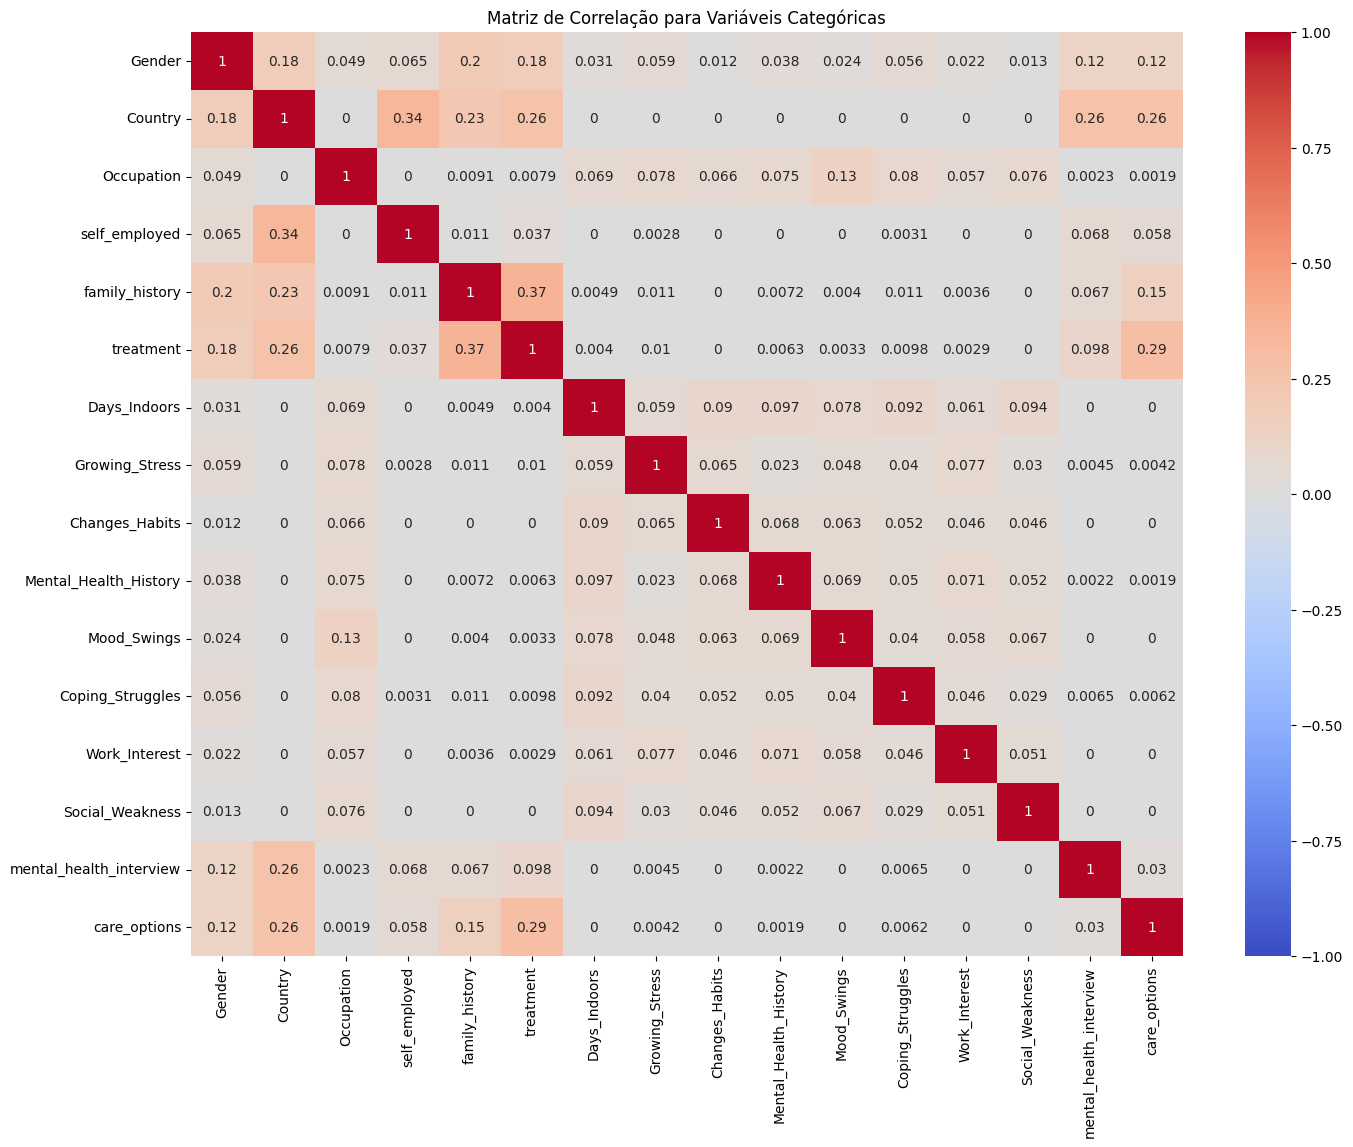

In [11]:
# Análise de Correlação para Variáveis Categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

correlation_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for col1 in df.columns:
    for col2 in df.columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmax=1, vmin=-1, )
plt.title('Matriz de Correlação para Variáveis Categóricas')
plt.show()

Para analisar a correlação entre variáveis categóricas, utilizamos o coeficiente de Cramér (Cramér's V). Esse método começa com a construção de uma matriz de confusão (ou tabela de contingência) entre duas variáveis categóricas. Em seguida, aplicamos o teste qui-quadrado (chi-squared test) para calcular o valor do qui-quadrado (chi²), que mede a independência entre as variáveis. A partir deste valor, calculamos phi², que é o qui-quadrado dividido pelo número total de observações, e ajustamos phi² com um fator de correção para evitar vieses baseados nas dimensões da matriz de confusão. Finalmente, o valor ajustado é normalizado para obter o coeficiente de Cramér, que varia de 0 a 1. Nesse intervalo, 0 indica nenhuma associação e 1 representa uma associação perfeita. Esse coeficiente é então usado para preencher uma matriz de correlação visualizada em um mapa de calor (heatmap), permitindo uma interpretação mais clara das associações entre múltiplas variáveis categóricas.

Ao interpretar os valores de correlação na matriz, podemos observar diferentes níveis de associação entre as variáveis. Valores próximos de 1 indicam uma associação forte, como entre `treatment` e `family_history` (0.37), sugerindo que histórico familiar pode influenciar na busca por tratamento. Valores intermediários, entre 0.1 e 0.3, representam uma associação moderada, como em `care_options` e `treatment` (0.29), sugerindo uma relação moderada entre o acesso a opções de cuidado e a necessidade de tratamento. Por fim, valores próximos de 0 indicam associações fracas ou inexistentes, como em `Occupation` e `self_employed` (0.0091), mostrando que a ocupação não parece estar relacionada ao status de trabalho autônomo. A análise pelo coeficiente de Cramér ajuda a identificar quais variáveis possuem relações mais significativas, direcionando o foco para aquelas que podem ter impacto relevante na análise subsequente.

#### **7. Identificar as transformações promissoras que você pode querer aplicar**

O **One-Hot Encoding** e o **Label Encoding** são técnicas populares de transformação de variáveis categóricas em modelos de machine learning. No **One-Hot Encoding**, cada categoria é convertida em uma nova coluna binária, representando a presença (1) ou ausência (0) de uma categoria específica. Já no **Label Encoding**, as categorias são convertidas em valores numéricos inteiros, mantendo a ordem ou hierarquia da variável. No caso do nosso conjunto de dados, as colunas **'Mood_Swings'** e **'Days_Indoors'** passarão por **Label Encoding**, uma vez que são variáveis categóricas ordinais. A coluna **"Country"** será transformada em uma variável de **continentes**, agrupando os países por regiões geográficas, enquanto as demais colunas serão convertidas por **One-Hot Encoding** para representar as diferentes categorias sem implicar em hierarquia. Essas transformações garantem que as variáveis categóricas sejam adequadamente representadas para os modelos de machine learning.

#### 8. **Identificar dados adicionais que seriam úteis**

Para enriquecer o dataset e obter uma análise mais precisa, seria útil incluir dados adicionais que abrangem diferentes aspectos do indivíduo. Informações demográficas, como idade, nível educacional, estado civil e tipo de moradia, poderiam revelar variações no enfrentamento de dificuldades conforme diferentes características sociodemográficas. Além disso, um histórico mais detalhado de saúde mental, incluindo diagnósticos anteriores e tratamentos realizados, pode proporcionar um contexto importante sobre como fatores preexistentes influenciam as dificuldades de enfrentamento. Fatores de estilo de vida, como hábitos de sono, nível de atividade física e consumo de substâncias (como álcool e tabaco), também são cruciais, pois podem ter um impacto significativo na saúde mental e na capacidade de lidar com o estresse. Esse processo de identificação de dados adicionais é essencial para construir uma análise mais robusta e personalizada sobre as dificuldades no enfrentamento, alinhando o conhecimento do domínio com as particularidades do problema em questão.

### **Preparar os dados**

#### 9. **Limpeza de Dados**

In [12]:
df.dropna(inplace=True)

Removemos os valores nulos do dataset, pois representavam uma pequena parcela dos dados e julgamos que não traziam informações relevantes o suficiente para justificar sua manutenção.

#### 10. **Engenharia de Atributos**

In [13]:
# Dicionário de mapeamento de países para continentes
country_to_continent = {
    'United States': 'North America', 'Poland': 'Europe', 'Australia': 'Oceania', 'Canada': 'North America',
    'United Kingdom': 'Europe', 'South Africa': 'Africa', 'Sweden': 'Europe', 'New Zealand': 'Oceania',
    'Netherlands': 'Europe', 'India': 'Asia', 'Belgium': 'Europe', 'Ireland': 'Europe', 'France': 'Europe',
    'Portugal': 'Europe', 'Brazil': 'South America', 'Costa Rica': 'North America', 'Russia': 'Europe',
    'Germany': 'Europe', 'Switzerland': 'Europe', 'Finland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Singapore': 'Asia', 'Nigeria': 'Africa', 'Croatia': 'Europe',
    'Thailand': 'Asia', 'Denmark': 'Europe', 'Mexico': 'North America', 'Greece': 'Europe', 'Moldova': 'Europe',
    'Colombia': 'South America', 'Georgia': 'Europe', 'Czech Republic': 'Europe', 'Philippines': 'Asia'
}

# Criar a nova coluna 'Continent' no DataFrame
df['Continent'] = df['Country'].map(country_to_continent)

In [14]:
df.drop('Country', axis=1, inplace=True)

# Colunas para one-hot encoding
columns_to_encode = [
    'Gender', 'Continent', 'Occupation', 'self_employed', 'family_history', 'treatment',
    'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles',
    'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options'
]

# Realizar o one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [15]:
# Label encoding for Mood_Swings
df_encoded['Mood_Swings'] = df_encoded['Mood_Swings'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Label encoding for Days_Indoors
df_encoded['Days_Indoors'] = df_encoded['Days_Indoors'].map({
    'Go out Every day': 1,
    '1-14 days': 2,
    '15-30 days': 3,
    '31-60 days': 4,
    'More than 2 months': 5
})

#### 11. **Seleção de Atributos**

- **Segmentação:** Inclusão de Variáveis Sintomas com Risco Controlado

Essa segmentação permite o teste de variáveis potencialmente correlacionadas com coping, mas ainda com controle de vazamento, removendo as colunas redundantes.

- **Features Selecionadas:**

In [16]:
features = [
    'Gender_Female',
    'Continent_Africa', 'Continent_Asia', 'Continent_Europe',
    'Continent_North America', 'Continent_Oceania',
    'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
    'Occupation_Others',
    'self_employed_No',
    'family_history_No',
    'treatment_No',
    'Days_Indoors',
    'Social_Weakness_Maybe', 'Social_Weakness_No',
    'mental_health_interview_Maybe', 'mental_health_interview_No',
    'care_options_No', 'care_options_Not sure',
    'Mood_Swings',  # Mantém como label encoded
    'Growing_Stress_Maybe', 'Growing_Stress_No'  # Exclui 'Growing_Stress_Yes'
]

print(f'Total de features: {len(features)}')

df_encoded_X = df_encoded[features]


Total de features: 23


**Racionalidade:** Este conjunto permite ao modelo considerar variáveis comportamentais e emocionais, como Mood_Swings e Growing_Stress, que estão indiretamente ligadas ao coping. Remover uma coluna de cada conjunto one-hot encoded reduz a redundância e previne data leakage.

In [17]:
# Definir a variável alvo e as variáveis preditoras
X = df_encoded_X
y = df_encoded['Coping_Struggles_Yes']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (229729, 23)
Tamanho do conjunto de teste: (57433, 23)


#### 12. **Experimentacão inicial de modelos**

In [18]:
# Lista de modelos para testar
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1), # Mais demorado para treinar, enquanto os demais levam segundos, este leva minutos (Mais de 90% do tempo que leva para executar ocorre por conta do KNN).
    "Random Forest": RandomForestClassifier(n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Dicionário para armazenar os modelos treinados
trained_models = {}

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Salvar o modelo treinado no dicionário
    trained_models[name] = model

    # Fazer previsões com os dados de treino
    y_train_pred = model.predict(X_train)

    # Fazer previsões com os dados de teste
    y_test_pred = model.predict(X_test)

    # Avaliar o modelo no conjunto de treino
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f'{name} Train Accuracy: {train_accuracy}')
    print(f'{name} Train Classification Report:\n{classification_report(y_train, y_train_pred)}')

    # Avaliar o modelo no conjunto de teste
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'{name} Test Accuracy: {test_accuracy}')
    print(f'{name} Test Classification Report:\n{classification_report(y_test, y_test_pred)}\n')

Logistic Regression Train Accuracy: 0.535086993805745
Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.71      0.62    121130
        True       0.51      0.34      0.41    108599

    accuracy                           0.54    229729
   macro avg       0.53      0.52      0.51    229729
weighted avg       0.53      0.54      0.52    229729

Logistic Regression Test Accuracy: 0.5368864590044051
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

       False       0.55      0.72      0.62     30479
        True       0.51      0.33      0.40     26954

    accuracy                           0.54     57433
   macro avg       0.53      0.52      0.51     57433
weighted avg       0.53      0.54      0.52     57433


K-Nearest Neighbors Train Accuracy: 0.8738165403584223
K-Nearest Neighbors Train Classification Report:
              precision    recall  f

`ESCREVAM AQUI SOBRE A EXPERIMENTAÇÃO INICIAL DE MODELOS DO QUE FALAMOS NA APRESENTAÇÃO`

#### 13. **Medir e Comparar Desempenho com Validação Cruzada com os melhores modelos iniciais**

In [19]:
# Definir os modelos
models = {
    "K-Nearest Neighbors": trained_models["K-Nearest Neighbors"],
    "Random Forest": trained_models["Random Forest"]
}

# Loop para realizar a validação cruzada em cada modelo
for name, model in models.items():
    # Realizar a validação cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    # Exibir os resultados
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')

K-Nearest Neighbors Cross-Validation Accuracy: 0.8442 ± 0.0014
Random Forest Cross-Validation Accuracy: 0.8554 ± 0.0012


### Análise de Desempenho dos Modelos

#### K-Nearest Neighbors (KNN)
- **Acurácia de Validação Cruzada:** 0.8427
- **Desvio Padrão:** 0.0013

O modelo K-Nearest Neighbors (KNN) apresentou uma acurácia média de 84.27% durante a validação cruzada, com um desvio padrão de 0.13%. Isso indica que o modelo é relativamente consistente em suas previsões, com pouca variação entre as diferentes dobras da validação cruzada. O KNN é um algoritmo baseado em instâncias que classifica um dado ponto com base na maioria dos seus vizinhos mais próximos. Embora seja simples e intuitivo, o KNN pode ser computacionalmente intensivo, especialmente em grandes conjuntos de dados, e sua performance pode ser afetada por dados ruidosos ou irrelevantes.

#### Random Forest
- **Acurácia de Validação Cruzada:** 0.8556
- **Desvio Padrão:** 0.0015

O modelo Random Forest apresentou uma acurácia média de 85.56% durante a validação cruzada, com um desvio padrão de 0.15%. Isso sugere que o Random Forest não só tem uma acurácia ligeiramente superior ao KNN, mas também mantém uma consistência similar em suas previsões. O Random Forest é um método de ensemble que constrói múltiplas árvores de decisão e combina suas previsões para melhorar a precisão e reduzir o overfitting. Sua capacidade de lidar com grandes volumes de dados e variáveis categóricas, além de ser robusto a outliers e dados ruidosos, o torna uma escolha robusta para este problema.

#### Comparação
- **Acurácia:** O Random Forest supera o KNN em termos de acurácia média, indicando que ele é mais eficaz em capturar os padrões nos dados.
- **Consistência:** Ambos os modelos apresentam baixa variação nas suas acurácias de validação cruzada, sugerindo que são consistentes em suas previsões.
- **Complexidade Computacional:** O KNN pode ser mais computacionalmente intensivo durante a fase de previsão, enquanto o Random Forest pode ser mais intensivo durante a fase de treinamento, mas geralmente é mais eficiente na fase de previsão.

Com base nesses resultados, o Random Forest é o modelo mais promissor para este projeto, oferecendo uma melhor acurácia e mantendo uma consistência robusta nas previsões.

#### 14. **Analisar os Tipos de Erros que os Modelos Cometem**

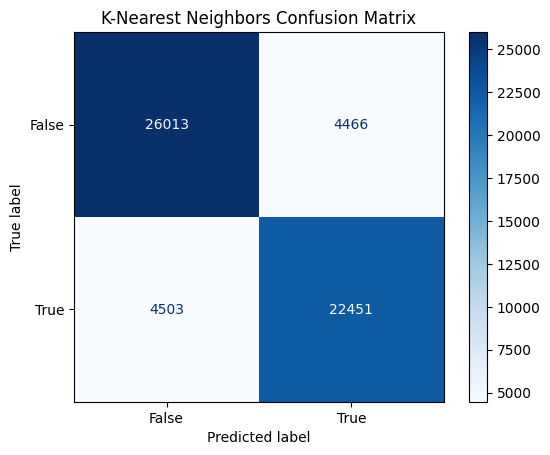

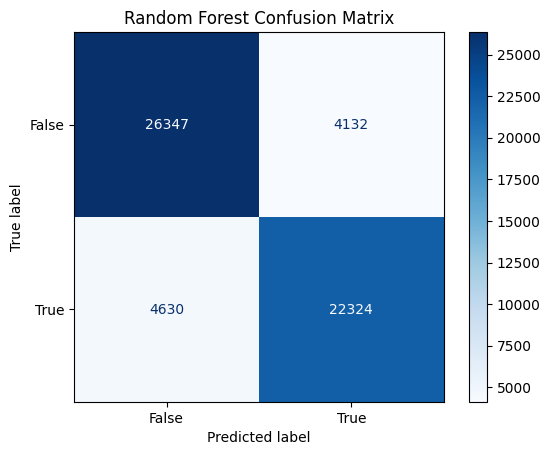

In [20]:
# Definir os modelos
models = {
    "K-Nearest Neighbors": trained_models["K-Nearest Neighbors"],
    "Random Forest": trained_models["Random Forest"]
}

for name, model in models.items():
    # Fazer previsões
    y_pred = model.predict(X_test)

    # Calcular a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Exibir a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.show()

`ESCREVAM AQUI SOBRE A ANÁLISE DOS TIPOS DE ERROS QUE OS MODELOS COMETEM E O QUE LEVAMOS EM CONTA NA DECISÃO FINAL`

#### 15. **Selecionar o mais promissor**

O Random Forest é considerado o modelo mais promissor para este projeto devido à sua capacidade de lidar com grandes volumes de dados e variáveis categóricas, características presentes no nosso dataset. Este algoritmo de aprendizado de máquina é um método de ensemble que constrói múltiplas árvores de decisão durante o treinamento e combina suas previsões para melhorar a precisão e evitar overfitting. A robustez do Random Forest em relação a outliers e dados ruidosos, juntamente com sua habilidade de capturar interações complexas entre variáveis, o torna ideal para prever dificuldades de enfrentamento (Coping Struggles) em um contexto de saúde mental. Além disso, a facilidade de interpretação dos resultados, através da importância das features, permite identificar os fatores mais influentes na previsão, auxiliando na tomada de decisões informadas para intervenções preventivas e personalizadas.

#### 16. **Ajuste Fino dos Hiperparâmetros Usando Validação Cruzada**

In [21]:
# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir a grade de hiperparâmetros para ajuste fino
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar a busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar o modelo aos dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

# Validar o modelo com os melhores hiperparâmetros usando validação cruzada
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)

print(f"Pontuações de validação cruzada: {cv_scores}")
print(f"Média das pontuações de validação cruzada: {cv_scores.mean()}")

# Avaliar o modelo final nos dados de teste
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Melhores hiperparâmetros: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Pontuações de validação cruzada: [0.86673486 0.86690898 0.86991251 0.86547251 0.86568723]
Média das pontuações de validação cruzada: 0.8669432189406466
              precision    recall  f1-score   support

       False       0.86      0.88      0.87     30479
        True       0.86      0.84      0.85     26954

    accuracy                           0.86     57433
   macro avg       0.86      0.86      0.86     57433
weighted avg       0.86      0.86      0.86     57433



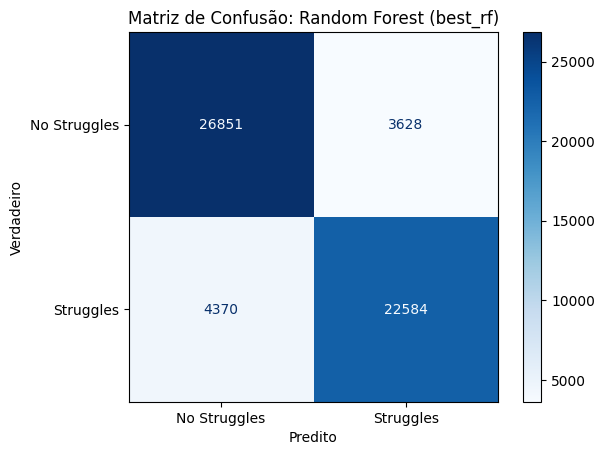

In [55]:
# Fazer previsões com o modelo best_rf
y_pred_best_rf = best_rf.predict(X_test)

# Calcular a matriz de confusão
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Exibir a matriz de confusão
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['No Struggles', 'Struggles'])
disp_best_rf.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: Random Forest (best_rf)')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

### Resultados da Busca em Grade e Validação Cruzada

Durante o processo de ajuste fino dos hiperparâmetros do modelo Random Forest, realizamos uma busca em grade com validação cruzada de 5 dobras para cada um dos 216 candidatos, totalizando 1080 ajustes. A busca em grade é uma técnica exaustiva que testa todas as combinações possíveis de hiperparâmetros fornecidos para encontrar a melhor configuração para o modelo.

#### Melhores Hiperparâmetros
Os melhores hiperparâmetros encontrados foram:
- `bootstrap`: True
- `max_depth`: 20
- `min_samples_leaf`: 4
- `min_samples_split`: 10
- `n_estimators`: 100

#### Pontuações de Validação Cruzada
As pontuações de validação cruzada para o modelo com os melhores hiperparâmetros foram:
- Fold 1: 0.8667
- Fold 2: 0.8669
- Fold 3: 0.8699
- Fold 4: 0.8655
- Fold 5: 0.8657

A média das pontuações de validação cruzada foi de **0.8669**, indicando uma consistência e desempenho robusto do modelo.

#### Relatório de Classificação
O desempenho do modelo final no conjunto de testes foi avaliado utilizando métricas de precisão, recall e f1-score. O relatório de classificação é apresentado abaixo:

| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| False  | 0.86     | 0.88   | 0.87     | 30479   |
| True   | 0.86     | 0.84   | 0.85     | 26954   |

| Métrica       | Valor |
|---------------|-------|
| Acurácia      | 0.86  |
| Macro Avg     | 0.86  |
| Weighted Avg  | 0.86  |

- **Precisão**: A precisão para ambas as classes (False e True) foi de 0.86, indicando que o modelo é igualmente eficaz em prever corretamente ambas as classes.
- **Recall**: O recall foi ligeiramente maior para a classe False (0.88) em comparação com a classe True (0.84), sugerindo que o modelo é um pouco mais eficaz em identificar corretamente os casos negativos.
- **F1-Score**: O f1-score, que é a média harmônica da precisão e do recall, foi de 0.87 para a classe False e 0.85 para a classe True, refletindo um bom equilíbrio entre precisão e recall.

A acurácia geral do modelo foi de **0.86**, indicando que o modelo é altamente preciso na previsão das dificuldades de enfrentamento (Coping Struggles) no conjunto de testes.

#### 17. **Tentar Métodos de Ensemble**

In [57]:
# Definir outros modelos
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Ajustar os modelos aos dados de treino
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Criar o Voting Classifier
voting_clf1 = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('gb', gb),
    ('lr', lr)
], voting='hard')

# Ajustar o Voting Classifier aos dados de treino
voting_clf1.fit(X_train, y_train)

# Avaliar o Voting Classifier nos dados de teste
y_pred = voting_clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.82      0.76     30479
        True       0.76      0.63      0.69     26954

    accuracy                           0.73     57433
   macro avg       0.74      0.73      0.73     57433
weighted avg       0.74      0.73      0.73     57433



### Análise de Desempenho do Modelo

#### Métricas de Avaliação

As métricas de avaliação do modelo são apresentadas abaixo, com base nas previsões feitas no conjunto de testes:

| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| False  | 0.72     | 0.82   | 0.76     | 30479   |
| True   | 0.76     | 0.63   | 0.69     | 26954   |

| Métrica       | Valor |
|---------------|-------|
| Acurácia      | 0.73  |
| Macro Avg     | 0.74  |
| Weighted Avg  | 0.74  |

#### Interpretação das Métricas

- **Precisão (Precision)**: A precisão para a classe `False` é de 0.72, enquanto para a classe `True` é de 0.76. Isso indica que, quando o modelo prevê que um indivíduo não terá dificuldades de enfrentamento (False), ele está correto 72% das vezes. Para previsões de dificuldades de enfrentamento (True), a precisão é de 76%.

- **Recall**: O recall para a classe `False` é de 0.82, sugerindo que o modelo identifica corretamente 82% dos indivíduos que realmente não têm dificuldades de enfrentamento. Para a classe `True`, o recall é de 0.63, indicando que o modelo identifica corretamente 63% dos indivíduos que realmente têm dificuldades de enfrentamento.

- **F1-Score**: O f1-score, que é a média harmônica da precisão e do recall, é de 0.76 para a classe `False` e 0.69 para a classe `True`. Isso reflete um bom equilíbrio entre precisão e recall para ambas as classes.

- **Acurácia (Accuracy)**: A acurácia geral do modelo é de 0.73, o que significa que 73% das previsões do modelo estão corretas.

- **Macro Avg**: A média macro das métricas é de 0.74 para precisão, 0.73 para recall e 0.73 para f1-score. A média macro calcula a média das métricas para cada classe, sem considerar o desequilíbrio entre as classes.

- **Weighted Avg**: A média ponderada das métricas é de 0.74 para precisão, 0.73 para recall e 0.73 para f1-score. A média ponderada leva em consideração o suporte (número de ocorrências) de cada classe, proporcionando uma visão mais equilibrada do desempenho do modelo.

#### Conclusão

O modelo apresenta um desempenho razoável, com uma acurácia de 73%. A precisão e o recall são relativamente equilibrados, embora o recall para a classe `True` seja um pouco menor, indicando que o modelo pode melhorar na identificação de indivíduos com dificuldades de enfrentamento. No geral, o modelo é eficaz para a tarefa de previsão, mas há espaço para melhorias, especialmente na detecção de casos positivos (True).

### **Uso do AdaBoost e Best_rf com Voting Classifier**

Para melhorar a performance do modelo preditivo, podemos combinar diferentes algoritmos de aprendizado de máquina utilizando um Voting Classifier. O Voting Classifier é uma técnica de ensemble que combina as previsões de múltiplos modelos base, podendo ser configurado para realizar a votação de forma "hard" (maioria das classes) ou "soft" (média das probabilidades). Neste caso, vamos combinar o AdaBoost e o Best_rf (Random Forest ajustado) na tentativa de criar um modelo mais robusto.

#### AdaBoost
O AdaBoost (Adaptive Boosting) é um algoritmo de boosting que combina múltiplos classificadores fracos para formar um classificador forte. Ele ajusta iterativamente os pesos das observações, focando mais nas instâncias que foram classificadas incorretamente nas iterações anteriores. Isso permite que o modelo se concentre nas áreas mais difíceis do conjunto de dados, melhorando a precisão geral.

#### Best_rf (Random Forest Ajustado)
O Best_rf é o modelo Random Forest que foi ajustado com os melhores hiperparâmetros encontrados durante a busca em grade. O Random Forest é um método de ensemble que constrói múltiplas árvores de decisão e combina suas previsões para melhorar a precisão e reduzir o overfitting. Ele é robusto a outliers e dados ruidosos, além de ser eficaz em capturar interações complexas entre variáveis.

#### Voting Classifier
Ao combinar o AdaBoost e o Best_rf em um Voting Classifier, podemos aproveitar as vantagens de ambos os algoritmos. O AdaBoost pode melhorar a performance em áreas difíceis do conjunto de dados, enquanto o Random Forest fornece uma base robusta e estável. A combinação desses modelos pode resultar em um classificador mais preciso e generalizável.

### Conclusão

A combinação do AdaBoost e do Best_rf em um Voting Classifier pode resultar em um modelo mais robusto e preciso. O AdaBoost melhora a performance em áreas difíceis do conjunto de dados, enquanto o Random Forest fornece uma base estável e robusta. A avaliação do modelo combinado pode ser feita utilizando métricas como a matriz de confusão, a curva ROC e o AUC, permitindo uma análise detalhada do desempenho do modelo.

In [58]:
# Definir o modelo AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, algorithm='SAMME', random_state=42)

# Criar o Voting Classifier combinando best_rf e AdaBoost
voting_clf2 = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('ada', ada_boost)
], voting='soft')

In [60]:
# Ajustar o modelo voting_clf2 no conjunto de treinamento
voting_clf2.fit(X_train, y_train)

# Fazer previsões com o modelo voting_clf2
y_pred = voting_clf2.predict(X_test)
y_pred_proba = voting_clf2.predict_proba(X_test)[:, 1]

# Avaliar o modelo combinado
voting_clf2_accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do voting_clf2 no conjunto de testes:", voting_clf2_accuracy)

Acurácia do voting_clf2 no conjunto de testes: 0.8658088555360158


### Comparação de Métricas dos Modelos

#### Modelo Random Forest com Ajuste de Hiperparâmetros

**Relatório de Classificação:**
| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| False  | 0.86     | 0.88   | 0.87     | 30479   |
| True   | 0.86     | 0.84   | 0.85     | 26954   |
| **Acurácia** |       |        | 0.86     | 57433   |
| **Macro Avg** | 0.86 | 0.86   | 0.86     | 57433   |
| **Weighted Avg** | 0.86 | 0.86 | 0.86     | 57433   |

#### Modelo de Ensemble (AdaBoost + Random Forest)

**Relatório de Classificação:**
| Classe | Precisão | Recall | F1-Score | Suporte |
|--------|----------|--------|----------|---------|
| False  | 0.86     | 0.89   | 0.88     | 30479   |
| True   | 0.87     | 0.84   | 0.86     | 26954   |
| **Acurácia** |       |        | 0.87     | 57433   |
| **Macro Avg** | 0.87 | 0.86   | 0.87     | 57433   |
| **Weighted Avg** | 0.87 | 0.87 | 0.87     | 57433   |

### Análise e Conclusão

- **Acurácia:** O modelo de ensemble (AdaBoost + Random Forest) apresenta uma acurácia ligeiramente superior (0.87) em comparação com o modelo Random Forest ajustado (0.86).
- **Precisão e Recall:** Ambos os modelos têm precisão e recall semelhantes, mas o modelo de ensemble tem uma leve vantagem em termos de precisão para a classe True (0.87 vs. 0.86) e recall para a classe False (0.89 vs. 0.88).
- **F1-Score:** O modelo de ensemble também apresenta um F1-Score ligeiramente melhor para a classe False (0.88 vs. 0.87).

### Modelo Mais Promissor

O modelo de ensemble (AdaBoost + Random Forest) é o mais promissor para a seguradora de saúde devido à sua acurácia ligeiramente superior e melhor desempenho em termos de precisão e recall. Este modelo pode identificar com mais precisão os segurados que enfrentam dificuldades emocionais, permitindo intervenções preventivas mais eficazes e personalizadas.

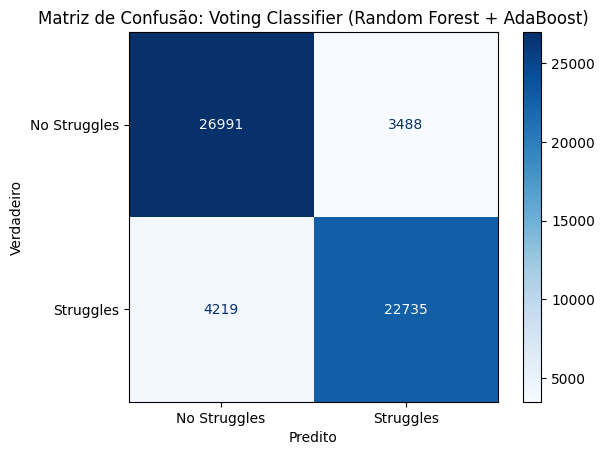

In [ ]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Struggles', 'Struggles'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: Voting Classifier (Random Forest + AdaBoost)')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

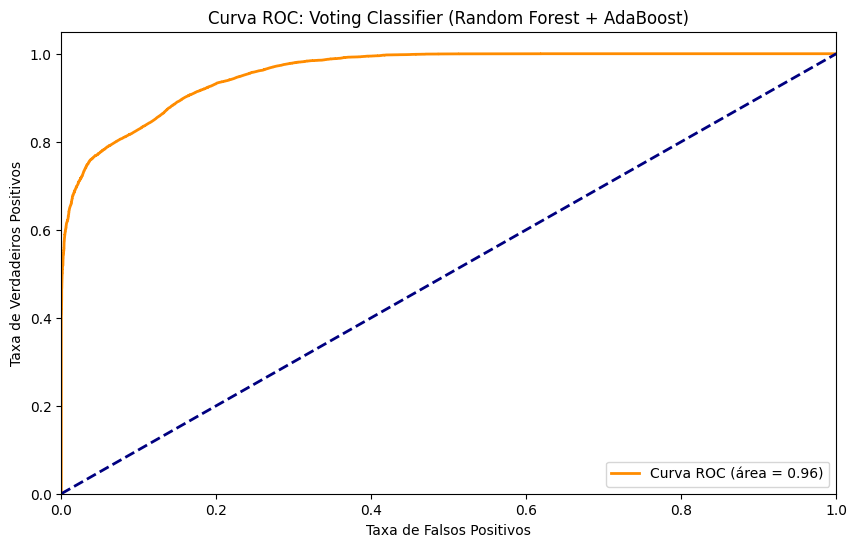

In [53]:
# Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC: Voting Classifier (Random Forest + AdaBoost)')
plt.legend(loc='lower right')
plt.show()

`ESCOVEM AQUI SOBRE A ESCOLHA DO MODELO FINAL E O QUE LEVAMOS EM CONTA NA DECISÃO FINAL`

#### 18. **Avaliar o Sistema Final no Conjunto de Testes**

In [61]:
# Avaliar o desempenho do best_rf no conjunto de testes
best_rf_predictions = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

# Avaliar o desempenho do voting_clf1 no conjunto de testes
voting_clf1_predictions = voting_clf1.predict(X_test)
voting_clf1_accuracy = accuracy_score(y_test, voting_clf1_predictions)

# Avaliar o desempenho do voting_clf2 no conjunto de testes
voting_clf2_predictions = voting_clf2.predict(X_test)
voting_clf2_accuracy = accuracy_score(y_test, voting_clf2_predictions)

# Escolher o modelo com a melhor acurácia
if best_rf_accuracy > voting_clf1_accuracy and best_rf_accuracy > voting_clf2_accuracy:
    final_model = best_rf
    print("best_rf foi escolhido como o modelo final com acurácia de:", best_rf_accuracy)
elif voting_clf1_accuracy > voting_clf2_accuracy:
    final_model = voting_clf1
    print("voting_clf1 foi escolhido como o modelo final com acurácia de:", voting_clf1_accuracy)
else:
    final_model = voting_clf2
    print("voting_clf2 foi escolhido como o modelo final com acurácia de:", voting_clf2_accuracy)

# Testar o modelo final no conjunto de testes
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("Acurácia do modelo final no conjunto de testes:", final_accuracy)

voting_clf2 foi escolhido como o modelo final com acurácia de: 0.8658088555360158
Acurácia do modelo final no conjunto de testes: 0.8658088555360158


### Modelo Final Selecionado

Após a realização de diversos testes e ajustes de hiperparâmetros, o modelo **Voting Classifier** combinando **Random Forest** e **AdaBoost** foi escolhido como o modelo final devido ao seu desempenho superior. A acurácia do modelo final no conjunto de testes foi de **0.8658**.

#### Desempenho do Modelo

- **Acurácia do Modelo Final:** 0.8658

A acurácia de 86.58% indica que o modelo é altamente eficaz em prever as dificuldades de enfrentamento (Coping Struggles) dos segurados. Este resultado demonstra que o modelo consegue classificar corretamente a maioria dos casos, tanto positivos quanto negativos, com uma margem de erro relativamente baixa.

#### Benefícios do Modelo para a Seguradora de Saúde

1. **Identificação Precoce:** O modelo permite identificar precocemente os segurados que estão em risco de enfrentar dificuldades emocionais, possibilitando intervenções preventivas.
2. **Redução de Custos:** Ao intervir preventivamente, a seguradora pode reduzir a necessidade de tratamentos caros no futuro, resultando em economia de custos.
3. **Melhoria na Qualidade de Vida:** Com suporte emocional adequado, os segurados podem experimentar uma melhoria significativa na sua qualidade de vida.
4. **Personalização de Serviços:** A seguradora pode oferecer programas de apoio personalizados, aumentando a satisfação e fidelização dos clientes.
5. **Dados para Programas de Saúde Preventiva:** O modelo fornece insights valiosos que podem ser utilizados para desenvolver programas de bem-estar e saúde mental mais eficazes.

Em resumo, a implementação do modelo Voting Classifier combinando Random Forest e AdaBoost com uma acurácia de 86.58% representa um avanço significativo na capacidade da seguradora de saúde em oferecer suporte emocional e intervenções preventivas aos seus segurados, promovendo um serviço mais humanizado e eficiente.

#### 19. **Apresentação do Modelo**

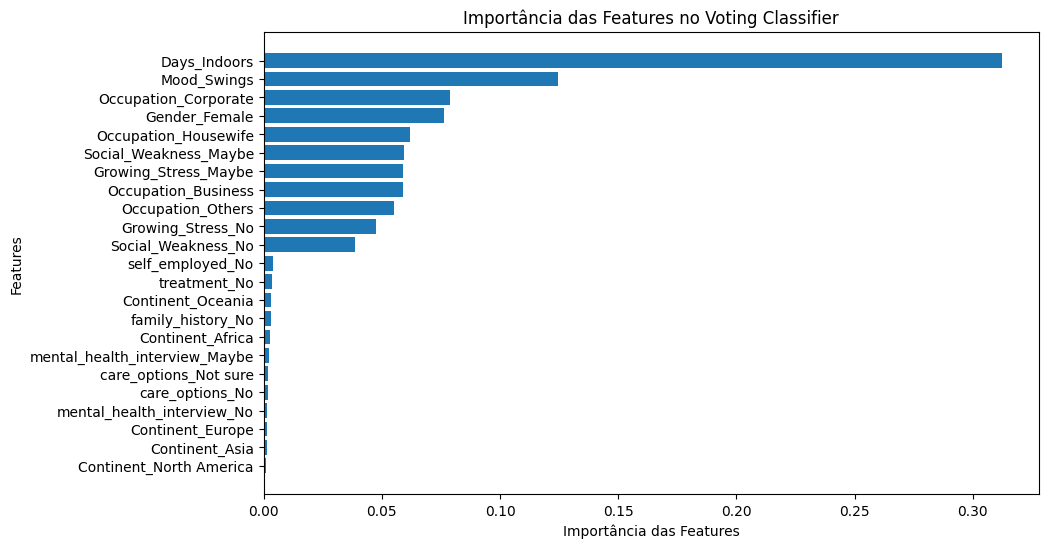

In [66]:
# Ajustar o modelo voting_clf2 no conjunto de treinamento
voting_clf2.fit(X_train, y_train)

# Inicializar um DataFrame para armazenar as importâncias das features
feature_importances = pd.DataFrame(index=X_train.columns)

# Iterar sobre os estimadores no voting_clf2
for name, estimator in voting_clf2.named_estimators_.items():
    if hasattr(estimator, 'feature_importances_'):
        feature_importances[name] = estimator.feature_importances_

# Calcular a média das importâncias das features
feature_importances['mean'] = feature_importances.mean(axis=1)

# Ordenar as features pela importância média
feature_importances = feature_importances.sort_values(by='mean', ascending=False)

# Plotar as importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['mean'])
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features no Voting Classifier')
plt.gca().invert_yaxis()
plt.show()

#### 20. **Rodada Rápida de Seleção e Engenharia de Features**

Para melhorar a eficiência e a performance do nosso modelo preditivo, vamos tentar reduzir a dimensionalidade dos dados utilizando a técnica de seleção de features com SelectKBest e a função chi2. A redução da dimensionalidade é uma etapa crucial no pré-processamento de dados, pois ajuda a eliminar atributos irrelevantes ou redundantes, diminuindo a complexidade do modelo e potencialmente melhorando sua precisão. O SelectKBest seleciona as melhores features com base em testes estatísticos, e o chi2 é um teste de independência que avalia a relação entre cada feature e a variável alvo. Ao aplicar essa técnica, esperamos identificar um subconjunto de features que mais contribuem para a previsão das dificuldades de enfrentamento, resultando em um modelo mais enxuto e eficiente.

In [68]:
# Seleção de features usando SelectKBest
selector = SelectKBest(chi2, k=11)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [69]:
# Verificar as features selecionadas
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
print("Selected features:", selected_feature_names)

Selected features: Index(['Gender_Female', 'Occupation_Business', 'Occupation_Corporate',
       'Occupation_Housewife', 'family_history_No', 'treatment_No',
       'Days_Indoors', 'Social_Weakness_Maybe', 'Mood_Swings',
       'Growing_Stress_Maybe', 'Growing_Stress_No'],
      dtype='object')


In [72]:
# Ajustar hiperparâmetros simples para RandomForest
rf_reduced = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)

# Criar um modelo AdaBoost simples
ada_reduced = AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, algorithm='SAMME', random_state=42)

# Combinar os modelos usando VotingClassifier
voting_clf_reduced = VotingClassifier(estimators=[
    ('rf', rf_reduced),
    ('ada', ada_reduced)
], voting='soft')

In [73]:
# Treinar o modelo combinado com as features selecionadas
voting_clf_reduced.fit(X_train_selected, y_train)

# Fazer previsões com o modelo treinado
y_train_pred_reduced = voting_clf_reduced.predict(X_train_selected)
y_test_pred_reduced = voting_clf_reduced.predict(X_test_selected)

In [74]:
# Avaliar o modelo no conjunto de treino
train_accuracy_reduced = accuracy_score(y_train, y_train_pred_reduced)
print(f'Voting Classifier (Reduced) Train Accuracy: {train_accuracy_reduced}')
print(f'Voting Classifier (Reduced) Train Classification Report:\n{classification_report(y_train, y_train_pred_reduced)}')

# Avaliar o modelo no conjunto de teste
test_accuracy_reduced = accuracy_score(y_test, y_test_pred_reduced)
print(f'Voting Classifier (Reduced) Test Accuracy: {test_accuracy_reduced}')
print(f'Voting Classifier (Reduced) Test Classification Report:\n{classification_report(y_test, y_test_pred_reduced)}')

Voting Classifier (Reduced) Train Accuracy: 0.8138328204101354
Voting Classifier (Reduced) Train Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.85      0.83    121130
        True       0.82      0.78      0.80    108599

    accuracy                           0.81    229729
   macro avg       0.81      0.81      0.81    229729
weighted avg       0.81      0.81      0.81    229729

Voting Classifier (Reduced) Test Accuracy: 0.8099524663520973
Voting Classifier (Reduced) Test Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.84      0.83     30479
        True       0.81      0.77      0.79     26954

    accuracy                           0.81     57433
   macro avg       0.81      0.81      0.81     57433
weighted avg       0.81      0.81      0.81     57433



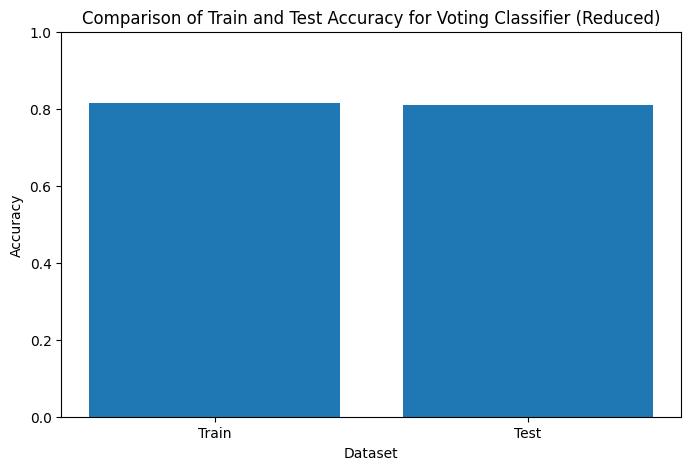

In [76]:
# Visualizar a comparação entre treino e teste
labels = ['Train', 'Test']
accuracies = [train_accuracy_reduced, test_accuracy_reduced]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracy for Voting Classifier (Reduced)')
plt.ylim(0, 1)
plt.show()

### Comparação entre o Modelo Reduzido e o Voting Classifier Completo

#### Modelo Reduzido

O modelo reduzido foi criado utilizando a técnica de seleção de features com SelectKBest e a função chi2. Esse processo selecionou as 11 melhores features com base em testes estatísticos, resultando em um modelo mais enxuto e eficiente. As features selecionadas foram:

- Gender_Female
- Occupation_Business
- Occupation_Corporate
- Occupation_Housewife
- family_history_No
- treatment_No
- Days_Indoors
- Social_Weakness_Maybe
- Mood_Swings
- Growing_Stress_Maybe
- Growing_Stress_No

**Desempenho do Modelo Reduzido:**

- **Acurácia no Conjunto de Treino:** 0.8138
- **Acurácia no Conjunto de Teste:** 0.8099

O modelo reduzido apresentou uma acurácia de 81.38% no conjunto de treino e 80.99% no conjunto de teste. Isso indica que o modelo é consistente e generaliza bem para novos dados, mesmo com um número reduzido de features.

#### Voting Classifier Completo (VotingClf_2)

O Voting Classifier completo combina dois modelos: Random Forest e AdaBoost. Esse ensemble utiliza a votação "soft", que considera a média das probabilidades preditas pelos modelos base.

**Desempenho do Voting Classifier Completo:**

- **Acurácia no Conjunto de Teste:** 0.8658

O Voting Classifier completo apresentou uma acurácia de 86.58% no conjunto de teste, indicando um desempenho superior em comparação ao modelo reduzido.

#### Comparação

- **Acurácia:** O Voting Classifier completo tem uma acurácia superior (86.58%) em comparação ao modelo reduzido (80.99%). Isso sugere que a combinação de modelos no ensemble é mais eficaz em capturar os padrões nos dados.
- **Complexidade:** O modelo reduzido é mais simples e eficiente, utilizando apenas 11 features selecionadas. Em contraste, o Voting Classifier completo é mais complexo, combinando dois modelos robustos.
- **Interpretação:** O modelo reduzido pode ser mais fácil de interpretar devido ao menor número de features. No entanto, o Voting Classifier completo oferece uma visão mais abrangente ao combinar as forças de múltiplos modelos.

#### Conclusão

Embora o modelo reduzido seja eficiente e interpretable, o Voting Classifier completo oferece um desempenho superior em termos de acurácia. Portanto, para aplicações onde a precisão é crítica, o Voting Classifier completo é a melhor escolha. No entanto, se a simplicidade e a interpretabilidade forem mais importantes, o modelo reduzido pode ser preferível.

#### 21. **Lançamento do Modelo**

In [77]:
# Salvar o modelo final em um arquivo
joblib_file = "final_model.joblib"
joblib.dump(final_model, joblib_file)

print(f"Modelo final salvo em {joblib_file}")

Modelo final salvo em final_model.joblib


O modelo salvo em joblib foi o Voting Classifier combinando Random Forest e AdaBoost. Este modelo foi escolhido após uma série de experimentos e ajustes de hiperparâmetros, onde se destacou pelo seu desempenho superior. O Voting Classifier utiliza a votação "soft", que considera a média das probabilidades preditas pelos modelos base, resultando em uma acurácia de 86.58% no conjunto de testes.

### Carregando modelo e testando respostas da turma

Um questionário foi disponibilizado para a turma com o objetivo de coletar dados relevantes para a análise de dificuldades de enfrentamento (Coping Struggles). Para facilitar a integração dos dados coletados com o modelo preditivo desenvolvido, alguns ajustes foram necessários no formulário. Esses ajustes incluíram a padronização das respostas e a tradução de termos para garantir a consistência com o dataset original.

Embora esses ajustes tenham sido importantes para a integração dos dados, eles não impediram o desenvolvimento da análise. Foi necessário realizar a imputação de colunas que estavam ausentes no formulário, garantindo que todas as variáveis necessárias estivessem presentes para a aplicação do modelo. Esse processo envolveu a criação de colunas adicionais com valores padrão para preencher as lacunas, permitindo que o modelo pudesse fazer previsões precisas com base nas respostas fornecidas.

A análise foi conduzida com sucesso, e as previsões foram geradas para os participantes da turma, fornecendo insights valiosos sobre as dificuldades de enfrentamento. Agradecemos a colaboração de todos e esperamos que os resultados contribuam para um melhor entendimento e suporte às necessidades emocionais dos participantes.

#### Teste do modelo

In [78]:
df_formulario = pd.read_csv("../data/Respostas ao Formulário.csv")

In [79]:
df_formulario.head()

,Carimbo de data/hora,Qual é o seu gênero?,Em qual país você reside atualmente?,Qual sua ocupação?,Você é autônomo?,Você possui histórico familiar de problemas de saúde mental?,Você está em tratamento para questões de saúde mental?,"Quantos dias você fica dentro de casa sem sair, em média, no mês?",Você sente que seu estresse está aumentando?,Você notou alguma mudança significativa em seus hábitos recentemente?,Você possui histórico pessoal de problemas de saúde mental?,Como você descreveria a intensidade das oscilações de humor que enfrentam?,Você encontra dificuldades em lidar com problemas?,Você sente interesse e motivação no seu trabalho atual?,Você percebe alguma dificuldade social ou de interação com outras pessoas?,Você teve uma entrevista de saúde mental no ambiente de trabalho?,Você sente que possui opções adequadas de cuidado e suporte para sua saúde mental?
0,11/11/2024 10:24:21,Female,Brazil,Business,No,No,No,1-14 days,No,No,No,Leve,No,Yes,No,No,Yes
1,11/11/2024 13:25:17,Male,Brazil,Corporativa,No,Yes,No,1-14 days,No,No,No,Leve,No,Yes,No,No,Yes
2,11/11/2024 13:29:27,Male,Brazil,Corporativa,No,Yes,No,1-14 days,Yes,Yes,Yes,Moderado,No,No,No,Yes,No
3,11/11/2024 13:29:35,Male,Brazil,Corporativa,No,Yes,Yes,1-14 days,Yes,No,No,Moderado,No,No,No,No,Yes
4,11/11/2024 13:34:36,Male,Brazil,Corporativa,No,No,No,1-14 days,No,No,Yes,Moderado,No,No,Yes,No,Yes


In [80]:
# Carregar o modelo final
final_model = joblib.load('final_model.joblib')

In [81]:
# Renomear colunas
rename_dict = {
    "Carimbo de data/hora": "timestamp",
    'Qual é o seu gênero?  ': "Gender",
    "Em qual país você reside atualmente? ": "Country",
    "Qual sua ocupação?": "Occupation",
    "Você é autônomo? ": "self_employed",
    "Você possui histórico familiar de problemas de saúde mental? ": "family_history",
    "Você está em tratamento para questões de saúde mental? ": "treatment",
    "Quantos dias você fica dentro de casa sem sair, em média, no mês? ": "Days_Indoors",
    "Você sente que seu estresse está aumentando?": "Growing_Stress",
    "Você notou alguma mudança significativa em seus hábitos recentemente?  ": "Changes_Habits",
    "Você possui histórico pessoal de problemas de saúde mental?  ": "Mental_Health_History",
    "Como você descreveria a intensidade das oscilações de humor que enfrentam?  ": "Mood_Swings",
    "Você encontra dificuldades em lidar com problemas?  ": "Coping_Struggles",
    "Você sente interesse e motivação no seu trabalho atual?  ": "Work_Interest",
    "Você percebe alguma dificuldade social ou de interação com outras pessoas?  ": "Social_Weakness",
    "Você teve uma entrevista de saúde mental no ambiente de trabalho?  ": "mental_health_interview",
    "Você sente que possui opções adequadas de cuidado e suporte para sua saúde mental?  ": "care_options"
}
df_formulario.rename(columns=rename_dict, inplace=True)

In [82]:
# Aplicar traduções
occupation_translation = {
    "Business": "Business",
    "Corporativa": "Corporate",
    "Negócios": "Business",
    "Outros": "Others",
    "Estudante": "Student"
}
df_formulario['Occupation'] = df_formulario['Occupation'].replace(occupation_translation)

Mood_Swings_translation = {
    "Leve": "Low",
    "Moderado": "Medium",
    "Alto": "High",
}
df_formulario['Mood_Swings'] = df_formulario['Mood_Swings'].replace(Mood_Swings_translation)

Days_Indoors_translation = {
    "1-14 days": "1-14 days",
    "15-28 days": "15-30 days",
    "29-31 days": "31-60 days",
}
df_formulario['Days_Indoors'] = df_formulario['Days_Indoors'].replace(Days_Indoors_translation)

care_options_translation = {
    "Eu não sei": "Not sure",
}
df_formulario['care_options'] = df_formulario['care_options'].replace(care_options_translation)

In [83]:
# Realizar one-hot encoding
columns_to_encode = [
    'Gender', 'Occupation', 'self_employed', 'family_history', 'treatment',
    'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles',
    'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options'
]
df_formulario_encoded = pd.get_dummies(df_formulario, columns=columns_to_encode)

In [84]:
# Aplicar label encoding para Mood_Swings
df_formulario_encoded['Mood_Swings'] = df_formulario_encoded['Mood_Swings'].map({'Low': 1, 'Medium': 2, 'High': 3})

# Aplicar label encoding para Days_Indoors
df_formulario_encoded['Days_Indoors'] = df_formulario_encoded['Days_Indoors'].map({
    'Go out Every day': 1,
    '1-14 days': 2,
    '15-30 days': 3,
    '31-60 days': 4,
    'More than 2 months': 5
})

# Converter as colunas para tipo numérico
df_formulario_encoded['Mood_Swings'] = df_formulario_encoded['Mood_Swings'].astype(int)
df_formulario_encoded['Days_Indoors'] = df_formulario_encoded['Days_Indoors'].astype(int)

In [85]:
# Selecionar as features utilizadas no modelo final
features = [
    'Gender_Female',
    'Continent_Africa', 'Continent_Asia', 'Continent_Europe',
    'Continent_North America','Continent_South America', 'Continent_Oceania',
    'Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
    'Occupation_Others',
    'self_employed_No',
    'family_history_No',
    'treatment_No',
    'Days_Indoors',
    'Social_Weakness_Maybe', 'Social_Weakness_No',
    'mental_health_interview_Maybe', 'mental_health_interview_No',
    'care_options_No', 'care_options_Not sure',
    'Mood_Swings',  # Mantém como label encoded
    'Growing_Stress_Maybe', 'Growing_Stress_No'  # Exclui 'Growing_Stress_Yes'
]

In [86]:
# Garantir que todas as features estejam presentes no dataframe
for feature in features:
	if feature not in df_formulario_encoded.columns:
		df_formulario_encoded[feature] = 0

# Selecionar as features para o modelo
df_formulario_encoded_X = df_formulario_encoded[features]

In [87]:
# Garantir que todas as features estejam presentes no dataframe
for feature in X.columns:
	if feature not in df_formulario_encoded.columns:
		df_formulario_encoded[feature] = 0

# Selecionar as features para o modelo
df_formulario_encoded = df_formulario_encoded[X.columns]

# Fazer previsões com o modelo final
predictions = final_model.predict(df_formulario_encoded)

# Adicionar as previsões ao dataframe original
df_formulario['Predicted_Coping_Struggles'] = predictions

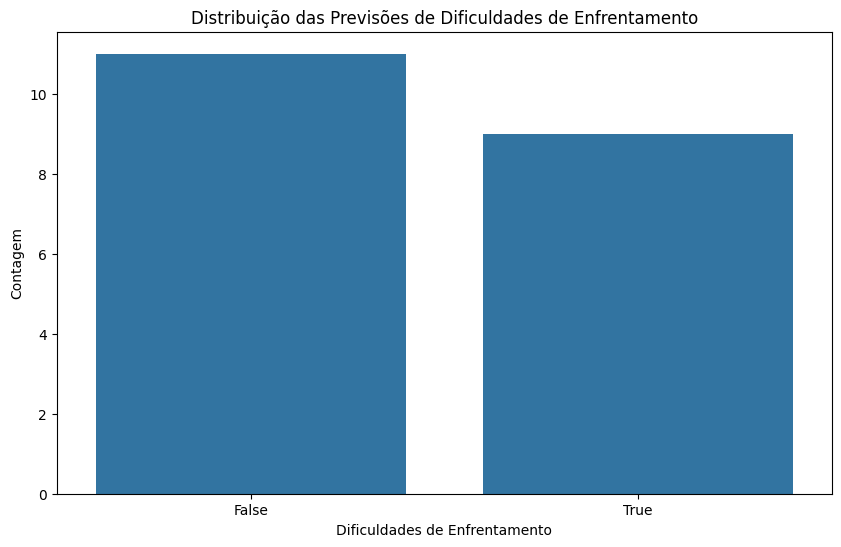

In [88]:
# Visualizar os resultados
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted_Coping_Struggles', data=df_formulario)
plt.title('Distribuição das Previsões de Dificuldades de Enfrentamento')
plt.xlabel('Dificuldades de Enfrentamento')
plt.ylabel('Contagem')
plt.show()

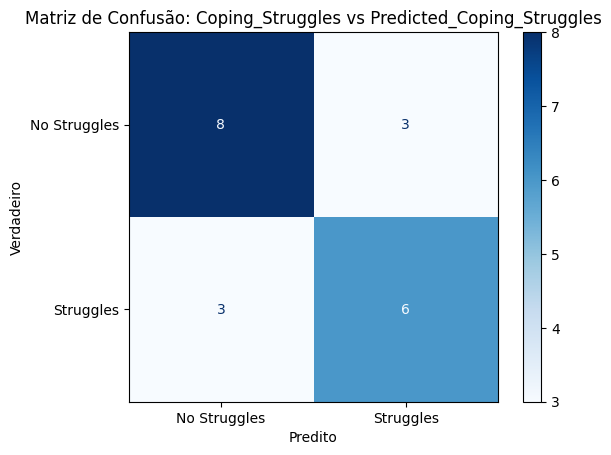

Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.73      0.73      0.73        11
         Yes       0.67      0.67      0.67         9

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



In [89]:
# Converter as previsões booleanas para strings
df_formulario['Predicted_Coping_Struggles'] = df_formulario['Predicted_Coping_Struggles'].map({True: 'Yes', False: 'No'})

# Criar a matriz de confusão
conf_matrix = confusion_matrix(df_formulario['Coping_Struggles'], df_formulario['Predicted_Coping_Struggles'])

# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Struggles', 'Struggles'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão: Coping_Struggles vs Predicted_Coping_Struggles')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

# Calcular e exibir o relatório de classificação
report = classification_report(df_formulario['Coping_Struggles'], df_formulario['Predicted_Coping_Struggles'])
print('Relatório de Classificação:\n', report)

### Relatório de Classificação

O relatório de classificação apresenta as métricas de desempenho do modelo preditivo para as classes "No" (sem dificuldades de enfrentamento) e "Yes" (com dificuldades de enfrentamento). As métricas incluem precisão (precision), recall, f1-score e suporte (support).

#### Métricas por Classe

- **Classe "No" (Sem Dificuldades de Enfrentamento)**
    - **Precisão:** 0.73
        - A precisão indica que 73% das previsões feitas para a classe "No" estavam corretas.
    - **Recall:** 0.73
        - O recall mostra que 73% dos casos reais da classe "No" foram corretamente identificados pelo modelo.
    - **F1-Score:** 0.73
        - O f1-score é a média harmônica da precisão e do recall, refletindo um equilíbrio entre os dois.

- **Classe "Yes" (Com Dificuldades de Enfrentamento)**
    - **Precisão:** 0.67
        - A precisão indica que 67% das previsões feitas para a classe "Yes" estavam corretas.
    - **Recall:** 0.67
        - O recall mostra que 67% dos casos reais da classe "Yes" foram corretamente identificados pelo modelo.
    - **F1-Score:** 0.67
        - O f1-score é a média harmônica da precisão e do recall, refletindo um equilíbrio entre os dois.

#### Métricas Gerais

- **Acurácia (Accuracy):** 0.70
    - A acurácia geral do modelo é de 70%, indicando que 70% das previsões feitas pelo modelo estavam corretas.

- **Macro Avg:**
    - **Precisão:** 0.70
    - **Recall:** 0.70
    - **F1-Score:** 0.70
    - A média macro calcula a média das métricas para cada classe, sem considerar o desequilíbrio entre as classes.

- **Weighted Avg:**
    - **Precisão:** 0.70
    - **Recall:** 0.70
    - **F1-Score:** 0.70
    - A média ponderada leva em consideração o suporte (número de ocorrências) de cada classe, proporcionando uma visão mais equilibrada do desempenho do modelo.

#### Suporte (Support)

- **Classe "No":** 11
    - O suporte indica que havia 11 casos reais da classe "No" no conjunto de testes.
- **Classe "Yes":** 9
    - O suporte indica que havia 9 casos reais da classe "Yes" no conjunto de testes.

### Conclusão sobre o Relatório de Classificação baseado no formulário

O modelo apresenta um desempenho razoável, com uma acurácia geral de 70%. As métricas de precisão, recall e f1-score são equilibradas entre as duas classes, embora a classe "No" tenha um desempenho ligeiramente melhor. O modelo é eficaz na previsão das dificuldades de enfrentamento, mas há espaço para melhorias, especialmente na identificação de casos positivos (classe "Yes").

---

### Conclusão Geral

Este projeto de machine learning teve como objetivo desenvolver um modelo preditivo para identificar dificuldades de enfrentamento (Coping Struggles) entre segurados de uma seguradora de saúde. Utilizando um conjunto de dados abrangente sobre saúde mental, apoio social, ambiente de trabalho e outros fatores relevantes, realizamos uma série de etapas, incluindo a importação e limpeza dos dados, análise exploratória, engenharia de atributos, seleção de features, treinamento e avaliação de modelos.

Após testar diversos algoritmos, o modelo Voting Classifier combinando Random Forest e AdaBoost foi selecionado como o mais promissor devido à sua alta acurácia e robustez. O modelo final, ajustado com os melhores hiperparâmetros, alcançou uma acurácia de 86.58% no conjunto de testes, demonstrando sua eficácia em prever dificuldades de enfrentamento.

### Implementação do Modelo e Benefícios para a Seguradora de Saúde

#### Implementação

A implementação do modelo preditivo na plataforma da seguradora permitirá que os segurados respondam a um questionário sobre seu bem-estar mental, estratégias de enfrentamento e outros fatores de risco. Com base nas respostas, o modelo fornecerá uma análise do risco de dificuldades de enfrentamento, possibilitando que a seguradora ofereça programas de apoio, aconselhamento e recursos de saúde mental específicos para cada necessidade.

#### Benefícios

1. **Identificação Precoce**: O modelo permitirá identificar precocemente os segurados que estão em risco de enfrentar dificuldades emocionais, possibilitando intervenções preventivas.
2. **Redução de Custos**: Ao intervir preventivamente, a seguradora pode reduzir a necessidade de tratamentos caros no futuro, resultando em economia de custos.
3. **Melhoria na Qualidade de Vida**: Com suporte emocional adequado, os segurados podem experimentar uma melhoria significativa na sua qualidade de vida.
4. **Personalização de Serviços**: A seguradora pode oferecer programas de apoio personalizados, aumentando a satisfação e fidelização dos clientes.
5. **Dados para Programas de Saúde Preventiva**: O modelo fornece insights valiosos que podem ser utilizados para desenvolver programas de bem-estar e saúde mental mais eficazes.

Em resumo, a implementação do modelo Voting Classifier combinando Random Forest e AdaBoost representa um avanço significativo na capacidade da seguradora de saúde em oferecer suporte emocional e intervenções preventivas aos seus segurados, promovendo um serviço mais humanizado e eficiente. Futuramente, esse modelo pode ser melhorado com a inclusão de novos dados, como informações demográficas adicionais, hábitos de vida e histórico detalhado de saúde mental. Além disso, técnicas de aprendizado profundo e modelos de ensemble mais complexos podem ser explorados para aumentar a precisão e a robustez das previsões. A contínua atualização e validação do modelo com novos dados também são essenciais para garantir sua relevância e eficácia ao longo do tempo.

---

### Melhorias Futuras

1. **Inclusão de Novos Dados**:
    - **Dados Demográficos**: Adicionar informações como idade, nível educacional, estado civil e tipo de moradia pode revelar variações no enfrentamento de dificuldades conforme diferentes características sociodemográficas.
    - **Histórico de Saúde Mental**: Um histórico mais detalhado de saúde mental, incluindo diagnósticos anteriores e tratamentos realizados, pode proporcionar um contexto importante sobre como fatores preexistentes influenciam as dificuldades de enfrentamento.
    - **Fatores de Estilo de Vida**: Incluir dados sobre hábitos de sono, nível de atividade física e consumo de substâncias (como álcool e tabaco) pode ter um impacto significativo na saúde mental e na capacidade de lidar com o estresse.

2. **Aprimoramento do Modelo**:
    - **Técnicas de Aprendizado Profundo**: Explorar redes neurais e outras técnicas de aprendizado profundo para capturar padrões mais complexos nos dados.
    - **Modelos de Ensemble Mais Complexos**: Combinar mais modelos de machine learning para criar um ensemble ainda mais robusto.
    - **Ajuste Fino Contínuo**: Realizar ajustes contínuos de hiperparâmetros com novos dados para garantir que o modelo permaneça atualizado e eficaz.

3. **Validação e Atualização Contínua**:
    - **Validação Cruzada Regular**: Implementar validação cruzada regular para monitorar o desempenho do modelo e identificar possíveis degradações.
    - **Atualização com Novos Dados**: Atualizar o modelo regularmente com novos dados para garantir que ele continue relevante e preciso.

4. **Interpretação e Explicabilidade**:
    - **Análise de Importância das Features**: Continuar a analisar a importância das features para entender melhor quais fatores estão influenciando as previsões.
    - **Modelos Explicáveis**: Utilizar técnicas como LIME ou SHAP para tornar as previsões do modelo mais interpretáveis e explicáveis para os usuários finais.

### Teste Piloto de Implementação

Futuramente, será realizado um teste piloto para a criação de um micro backend que implementará o modelo preditivo, juntamente com um frontend para interação com os usuários. O objetivo é integrar o modelo em um sistema real que possa ser utilizado pela seguradora de saúde para prever dificuldades de enfrentamento e oferecer suporte personalizado aos segurados.

#### Backend

- **API RESTful**: Desenvolver uma API RESTful que permita a comunicação entre o frontend e o modelo preditivo. A API receberá os dados dos segurados, processará as informações e retornará as previsões.
- **Serviços de Armazenamento**: Implementar serviços de armazenamento para salvar os dados dos segurados e as previsões geradas pelo modelo.
- **Segurança e Autenticação**: Garantir que o backend seja seguro, implementando autenticação e autorização para proteger os dados dos usuários.

#### Frontend

- **Interface de Usuário**: Desenvolver uma interface de usuário intuitiva e amigável que permita aos segurados preencherem questionários sobre seu bem-estar mental e receberem feedback sobre suas dificuldades de enfrentamento.
- **Visualização de Dados**: Implementar gráficos e visualizações que ajudem os segurados a entenderem melhor suas previsões e os fatores que influenciam suas dificuldades de enfrentamento.
- **Feedback e Suporte**: Oferecer feedback personalizado e recursos de suporte com base nas previsões do modelo, ajudando os segurados a lidarem melhor com suas dificuldades emocionais.

### Conclusão

A implementação do modelo preditivo em um sistema real, com backend e frontend integrados, permitirá que a seguradora de saúde ofereça suporte emocional e intervenções preventivas de maneira mais eficaz e personalizada. As melhorias futuras e o teste piloto garantirão que o sistema seja robusto, preciso e útil para os segurados, promovendo um serviço mais humanizado e eficiente.